# PIPELINE DE CONSTRUCTION DU DATASET

Ce notebook contient le pipeline de préparations des données avant la construction de nos modèles de prédiction.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data_joined.csv")
data.drop("Unnamed: 0", axis=1, inplace=True)
data.head()

,BuildingType,ComplianceStatus,ENERGYSTARScore,Electricity(kBtu),LargestPropertyUseType,NaturalGas(kBtu),Neighborhood,NumberofBuildings,NumberofFloors,PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SourceEUI(kBtu/sf),SteamUse(kBtu),YearBuilt,TotalEmissionGES
0,NonResidential,Compliant,65.0,3686160.0,Hotel,1272388.0,DOWNTOWN,1.0,12.0,Hotel,88434,0,78.9,6981428.0,173.5,2023032.0,1927,249.43
1,NonResidential,Compliant,51.0,3905411.0,Hotel,4448985.0,DOWNTOWN,1.0,11.0,Hotel,88502,15064,94.4,8354235.0,191.3,0.0,1996,263.51
2,NonResidential,Compliant,18.0,49762435.0,Hotel,3709900.0,DOWNTOWN,1.0,41.0,Hotel,961990,0,96.6,73130656.0,242.7,19660404.0,1969,2061.48
3,NonResidential,Compliant,1.0,2769023.0,Hotel,2001894.0,DOWNTOWN,1.0,10.0,Hotel,61320,0,460.4,28229320.0,636.3,23458518.0,1926,1936.34
4,NonResidential,Compliant,67.0,6066245.0,Hotel,8763105.0,DOWNTOWN,1.0,18.0,Hotel,107430,12460,120.1,14829099.0,228.8,0.0,1980,507.70


In [3]:
data.shape

(6716, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6716 entries, 0 to 6715
Data columns (total 18 columns):
BuildingType              6716 non-null object
ComplianceStatus          6716 non-null object
ENERGYSTARScore           5093 non-null float64
Electricity(kBtu)         6697 non-null float64
LargestPropertyUseType    6560 non-null object
NaturalGas(kBtu)          6697 non-null float64
Neighborhood              6716 non-null object
NumberofBuildings         6708 non-null float64
NumberofFloors            6708 non-null float64
PrimaryPropertyType       6716 non-null object
PropertyGFABuilding(s)    6716 non-null int64
PropertyGFAParking        6716 non-null int64
SiteEUI(kBtu/sf)          6699 non-null float64
SiteEnergyUse(kBtu)       6701 non-null float64
SourceEUI(kBtu/sf)        6697 non-null float64
SteamUse(kBtu)            6697 non-null float64
YearBuilt                 6716 non-null int64
TotalEmissionGES          6697 non-null float64
dtypes: float64(10), int64(3), object(5)

In [5]:
data.describe()

,ENERGYSTARScore,Electricity(kBtu),NaturalGas(kBtu),NumberofBuildings,NumberofFloors,PropertyGFABuilding(s),PropertyGFAParking,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SourceEUI(kBtu/sf),SteamUse(kBtu),YearBuilt,TotalEmissionGES
count,5093.000000,6.697000e+03,6.697000e+03,6708.000000,6708.000000,6.716000e+03,6716.000000,6699.000000,6.701000e+03,6697.000000,6.697000e+03,6716.000000,6697.000000
mean,67.906342,3.591058e+06,1.311223e+06,1.071407,4.695736,8.329450e+04,9519.597975,54.182341,5.194673e+06,133.510303,2.625076e+05,1968.101549,114.935638
std,27.012124,1.248728e+07,5.685627e+06,1.593505,5.476218,1.733470e+05,33868.050881,55.101657,1.813648e+07,135.677195,3.704221e+06,33.020391,478.876573
min,1.000000,-1.154170e+05,0.000000e+00,0.000000,0.000000,-5.055000e+04,-3.000000,0.000000,0.000000e+00,-2.000000,0.000000e+00,1900.000000,-0.800000
25%,52.000000,6.372730e+05,0.000000e+00,1.000000,2.000000,2.727300e+04,0.000000,27.600000,9.200689e+05,74.000000,0.000000e+00,1948.000000,9.450000
50%,75.000000,1.167735e+06,3.051000e+05,1.000000,4.000000,4.218500e+04,0.000000,38.000000,1.791071e+06,95.600000,0.000000e+00,1974.000000,33.180000
75%,90.000000,2.797320e+06,1.149639e+06,1.000000,5.000000,8.112000e+04,0.000000,60.200000,4.135280e+06,143.900000,0.000000e+00,1996.000000,91.530000
max,100.000000,6.570744e+08,2.979090e+08,111.000000,99.000000,9.320156e+06,512608.000000,834.400024,8.739237e+08,2620.000000,1.349435e+08,2015.000000,16870.980000


In [6]:
data["SiteEnergyUse(kBtu)"].median()

1791071.375

In [7]:
def calcul_remplissage(df):
    
    donnees_totales = df.shape[0] * df.shape[1]
    donnees_remplies = df.count().sum()
    print("Sur", donnees_totales, "données possibles dans le dataset, il y a", donnees_totales - donnees_remplies, "données manquantes.")
    print("Cela représente un taux de remplissage de ", round((donnees_remplies / donnees_totales) * 100, 2), "%.")

# Fonctions preprocessing

Les fonctions suivantes serviront au traitement des données avant d'effectuer la modélisation.

### Outliers

Nous avons pu constater sur l'analyse des variables qu'il y avait des outliers qui peuvent perturber nos modèles de prédictions.

Nous allons essayer dex méthodes de traitement pour les supprimer :

 - Limiter manuellement des variables.
 - Utiliser les interquartiles

In [8]:
def supp_outliers(df, target, etape):
    
    #Taille batiment
    df = df.loc[df["PropertyGFABuilding(s)"] > 0]
    
    #Taille parking
    df = df.loc[df["PropertyGFAParking"] >= 0]
    
    #EmissionGES
    df = df.loc[df["TotalEmissionGES"] > 0]
    
    #Consommation énergie totale
    df = df.loc[df["SiteEnergyUse(kBtu)"] > 0]
    
    #Electricité
    df = df.loc[df["Electricity(kBtu)"] >= 0]
    
    #Gaz
    df = df.loc[df["NaturalGas(kBtu)"] >= 0]
    
    #SiteEUI
    df = df.loc[df["SiteEUI(kBtu/sf)"] >= 0]
    
    #SourceEUI
    df = df.loc[df["SourceEUI(kBtu/sf)"] >= 0]
    
    #SteamUse
    df = df.loc[df["SteamUse(kBtu)"] >= 0]
    
    if etape == 1:
        #Méthode de suppression des outliers par les interquartiles
        Q1 = df[target].quantile(0.25)
        Q3 = df[target].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df[target] < (Q1 - 1.5 * IQR)) |(df[target] > (Q3 + 1.5 * IQR)))]

    
    return df

In [9]:
def supp_outliers2(df, target, etape):
    
    var_quantitatives = df.select_dtypes(include=['int64', 'float64']).columns
    var_qualitatives = df.select_dtypes(include=['object']).columns
    
    #En premier, on remplace les valeurs négatives en valeurs positives
    df1 = pd.DataFrame(df.loc[:,var_quantitatives].abs(), columns=df[var_quantitatives].columns, index=df[var_quantitatives].index)
    df2 = df.loc[:, var_qualitatives]
    df = pd.concat([df2,df1], axis=1)
    
    #Méthode de suppression des outliers par les interquartiles
    if etape == 1:
        Q1 = df[target].quantile(0.25)
        Q3 = df[target].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df[target] < (Q1 - 1.5 * IQR)) |(df[target] > (Q3 + 1.5 * IQR)))]
    
    return df

### Valeurs manquantes

Nous allons utiliser le transformation de scikit learn SimpleImputer en deux fois :

 - 1 fois pour les variables quantitatives
 - 1 fois pour les variables qualitatives
 
Aves cette méthode, nous allons créer deux dataframes que nous finirons par concaténer pour retrouver un dataset sans valeur manquante.

In [10]:
from sklearn.impute import SimpleImputer

def imputation_val_quantitatives(df):
    
    var_quantitatives = df.select_dtypes(include=['int64', 'float64']).columns
    imputer_quant = SimpleImputer(strategy="median")
    imputer_quant.fit(df[var_quantitatives])
    X = imputer_quant.transform(df[var_quantitatives])
    df = pd.DataFrame(X, columns=df[var_quantitatives].columns, index=df[var_quantitatives].index)
    return df

In [11]:
def suppr_val_nan(df):
    
    df.dropna(how="any", inplace=True)
    
    return df

In [12]:
def imputation_val_qualitatives(df):
    
    var_qualitatives = df.select_dtypes(include=['object']).columns
    imputer_qual = SimpleImputer(strategy="most_frequent")
    imputer_qual.fit(df[var_qualitatives])
    X = imputer_qual.transform(df[var_qualitatives])
    df = pd.DataFrame(X, columns=df[var_qualitatives].columns, index=df[var_qualitatives].index)
    
    return df

In [13]:
def concat_sets(df1, df2):
    
    df = pd.concat([df1,df2], axis=1)
    
    return df

### Création d'une variable Surface réelle

Dans le but de simplifier les modèles nous allons scinder plusieurs variables comprenants des informations physiques des bâtiments.

Cette nouvelle variable "Surface_Reelle" est une formule de surface pour chaque observation :
 - Le nombre de niveaux
 - La surface totale au sol des batiments

La variable numberofFloors représente le nombre de niveaux et non d'étages. POur avoir le nombre d'étage il faut rajouter le rez-de-chaussée dans la formule.

Ainsi, au lieu d'avoir 2 features pour chaque observation, nous n'en aurons plus qu'une.

In [14]:
def create_var(df):
    
    #On crée une variable nombre d'étages qui est le nombre de niveaux + le rez de chaussée
    df["Nbr_etages"] = 1
    df["Nbr_etages"] = df["NumberofFloors"] + df["Nbr_etages"]
    
    #On calcule la surface réelle d'une observation
    df["Surface_reelle"] = df["Nbr_etages"] * df["PropertyGFABuilding(s)"]
    
    #On supprime les colonnes qui ne nous servent plus
    df.drop(["NumberofFloors","PropertyGFABuilding(s)","Nbr_etages"], axis=1, inplace=True)
    
    return df

### Fuite de données

Puisque l'on ne peut pas utiliser les données énergétiques pour nos prédictions, nous allons en faire un encodage binaire afin de voir si l'on peut en tirer des informations intéressantes :
 - 0 si la valeur = 0
 - 1 si la valeur > 0

In [15]:
def fuite_donnees(df):
    
    liste_colonnes = ["Electricity(kBtu)","NaturalGas(kBtu)","SiteEUI(kBtu/sf)","SourceEUI(kBtu/sf)","SteamUse(kBtu)"]
    
    for col in liste_colonnes:
        
        new_col = col[0:col.find("(")]
        
        df[new_col] = df[col].astype(bool)
        df.drop(col, axis=1, inplace=True)
        
    #print(len(liste_colonnes), "variables encodées.")
    
    return df
    
        #df.where(df[col]>0, 1, 0)
        
        #Traitement des valeurs manquantes
        #df.loc[df[col] == np.nan] = 0
        
        #Traitement du cas où le batiment utilise l'énergie testée
        #df.loc[df[col] > 0] = 1

### Variables qualitatives

Nous allons faire deux traitements différents suivant les variables.

 - Encodage binaire, pour les variables qui n'ont que 2 valeurs :
   - ComplianceStatus
   - DefaultData


 - Target coding, pour les variable qualitatives catégorielles :
   - BuildingType
   - PrimaryPropertyType
   - LargestPropertyType
 
Le target coding, cela consiste à remplacer chaque valeur d'une variable qualitative par la moyenne de la cible de cette valeur.
Exemple :
 - Prenons la valeur "hotel" de la variable BuildingType
 - On calcule la moyenne des émissions de GES pour la valeur "hotel"
 - On remplace toutes les lignes avec la valeur "hotel" pour la variable BuildingType par la moyenne calculée précédemment.

In [13]:
def encodage_binaire(df, lst_col):
    
    for col in lst_col:
        
        if col == "ComplianceStatus":
            
            np.where(df[col] == "Compliant", 1, col)
            np.where(df[col] == "Not Compliant", 0, col)
        
        elif col == "DefaultData":

SyntaxError: unexpected EOF while parsing (<ipython-input-13-4c2574414357>, line 10)

In [116]:
def target_coding(df):
    
    #On récupère le nom des variables qualitatives
    var_qualitatives = df.select_dtypes(include=['object']).columns
    
    #On commence le target coding
    
    #On balaye les variables qualitatives
    for val in var_qualitatives:
        
        #On extrait les valeurs uniques des variables
        #uniques = df[val].unique()
        
        #On calcule la moyenne pour chaque valeur
        #Pour cela, on crée un nouveau df, dans laquelle il y a 2 colonnes :
        #Chaque valeur de val
        #Les moyennes des émissions de GES asssociées
        new_df = df.groupby(val, as_index=False)["TotalEmissionGES"].mean()
        
        #On remplace les valeurs qualitatives par les moyennes
        for x in new_df.itertuples():
            df[val].replace(x[1], x[2], inplace=True)
            #df[val + "_Encoded"] = np.where(df[val] == x[1], round(x[2], 2), val)
            #df.where(df[val] == x[1], round(x[2],2))
        
    return df  

In [117]:
from category_encoders.target_encoder import TargetEncoder



ModuleNotFoundError: No module named 'category_encoders'

### Analyse en Composantes Principales (ACP)

L'analyse par composantes principales va nous permettre de réduire les variables numériques.

Cela permet de simplifier le modèle pour le rendre plus performant. Le but est d'essayer de perdre le moins d'informations possible dans l'opération. Pour cela nous aller tracer lles éboulis des valeurs propres. Ce graphique permet d'identifier la perte d'information par composantes résultantes.

Nous allons aussi tracer le cercle des corrélations et la projection des individus dans l'hyperplan afin de visualiser les résultats.

In [16]:
from sklearn.decomposition import PCA

def reduction_dim(df):

    var_quantitatives = df.select_dtypes(include=['int64', 'float64', 'bool']).columns

    n_comp = 6
    pca = PCA(n_components=n_comp)

    data_2D =  pd.DataFrame(pca.fit_transform(df[var_quantitatives]))#, columns=["Comp1", "Comp2","Comp3", "Comp4","Comp5", "Comp6"], index=df.index)
    
    #On appelle la fonction qui trace la courbe des éboulis des valeurs propres
    display_scree_plot(pca)
    
    #On appelle la fonction qui trace le cercle des corrélations
    #print(pca.components_)
    #pcs = pca.components_
    #display_circles(pcs, n_comp, pca, [(0,1),(0,1),(0,1)], labels = np.array(var_quantitatives))
    
    #On appelle la fonction qui trace la projection des individus
    #display_factorial_planes(data_2D, n_comp, pca, [(0,1),(0,1),(0,1)], alpha = 0.2)
    
    ##Il faut récupérer les colonnes qualitatives
    #col_qual = df.select_dtypes(include=['object']).columns
    
    ##Et les concaténer au précédent
    #df_concat = pd.concat([data_2D, df[col_qual]], axis=1)
    
    return data_2D

In [17]:
def display_scree_plot(acp):
    scree = acp.explained_variance_ratio_*100
    print(scree)
    print("Le premier plan factoriel représente {} % de la variance totale.".format(round(scree[0] + scree[1],2)))
    print("Le deuxième plan factoriel représente {} % de la variance totale.".format(round(scree[2] + scree[3],2)))
    print("Le troisième plan factoriel représente {} % de la variance totale.".format(round(scree[4] + scree[5],2)))
    plt.figure(figsize=(8, 8))
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

In [14]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(15,15))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
            plt.margins(x=0.25, y=0.25)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

In [121]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(15,15))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected.iloc[:, d1], X_projected.iloc[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected.iloc[selected, d1], X_projected.iloc[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected.iloc[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected.iloc[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary[0], boundary[0]])
            plt.ylim([-boundary[1], boundary[1]])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

### Séparation des données

Nous allons spliter le dataset en laissant des données vierges de tout traitement de préparation.

Nous avons codé deux hypothèses de séparation :
 - Une séparation aléatoire simple
 - Une séparation stratifiée sur une variable qualitative encodée catégorielle (Exemple : Par type de batiment)

In [17]:
#Split pour la prédiction des GES

from sklearn.model_selection import train_test_split

def split_data(df, target):

    y = df[target]

    X = df.drop(["TotalEmissionGES","SiteEnergyUse(kBtu)"], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    return [X_train, X_test, y_train, y_test]

In [32]:
from sklearn.preprocessing import LabelEncoder

def create_var(df, var):
    
    le = LabelEncoder()
    
    df["Strat"] = le.fit_transform(df[var])
    
    lst_cat = df["Strat"].unique()
    lst_cat.sort()
    
    for i in lst_cat:
        
        df_temp = df.loc[df["Strat"] == i]
        print("Encodage :", i, "| Modalité :", df_temp[var].unique(), "| Nbr observations :", df_temp.shape[0], "| Pourcentage :", round((df_temp.shape[0]/len(df)) * 100,2), "%")

    return df


In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

def strat_split_data(df, var, target):
    
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

    for train_set, test_set in split.split(df, df["Strat"]):
        strat_train_set = df.iloc[train_set]
        strat_test_set = df.iloc[test_set]
    
    
    X_train = strat_train_set.drop(["TotalEmissionGES","SiteEnergyUse(kBtu)"], axis=1)
    y_train = strat_train_set[target]

    X_test = strat_test_set.drop(["TotalEmissionGES","SiteEnergyUse(kBtu)"], axis=1)
    y_test = strat_test_set[target]              
    
    #On supprime la variable strat
    for set_ in (X_train, X_test):
        set_.drop("Strat", axis=1, inplace=True)
    
    return [X_train, X_test, y_train, y_test]

### Normalisation des données

Nous avons vu que les distributions de nos variables ne sont pas normales car très asymétriques à gauche. Nous allons donc rendre ces distributions normales.

Il existe quelques méthodes pour faire cela :
 - Le passage au logarithme
 - Box-cox
 - Yeo-Johnson
 
L'inconvénient du box-cox dans notre cas est qu'il est obligatoire d'avoir des valeurs strictement > 0, ce que nous, nous avons. 

La méthode Yeo-Johnson n'a pas cette contrainte, nous pouvons donc l'utiliser.

A noter que l'on peut aussi utiliser le passage au log. 

In [21]:
from sklearn.preprocessing import power_transform

def normalisation_yj(df, type_df):
        
    if df.shape[1] > 1:
        #On commence par traiter X_train
        #On ne va normaliser que les colonnes numériques
        df_normalized = pd.DataFrame(power_transform(df, method="yeo-johnson"), columns=df.columns, index=df.index)

        ##Il faut récupérer les colonnes qualitatives
        #colonnes = df_X.select_dtypes(include=['object']).columns

        ##Et les concaténer au précédent
        #df_concat = pd.concat([df_normalized_X, df_X[colonnes]], axis=1)

    else:
        #Ensuite on traite y_train
        df_normalized = power_transform(df, method="yeo-johnson")
        
        if type_df == "train":
            df_normalized = pd.DataFrame(df_normalized, columns=["TotalEmissionGES"], index = X_train.index)
        else:
            df_normalized = pd.DataFrame(df_normalized, columns=["TotalEmissionGES"], index = X_test.index)
            
    return df_normalized

In [19]:
def passage_log(df, type_df, target, idx_df):
    
    
    #On commence par le X_train
    if df.shape[1] > 1:
        
        var_quantitatives = df.select_dtypes(include=['int64', 'float64']).columns
        
        df_normalized = np.log(df[var_quantitatives])
        
        #Il faut récupérer les colonnes qualitatives
        colonnes = df.select_dtypes(include=['object']).columns

        #Et les concaténer au précédent
        df = pd.concat([df_normalized, df[colonnes]], axis=1)
    
    #Ensuite, le y_train
    else:
        
        df = np.log(df)

        if type_df == "train":
            df = pd.DataFrame(df, columns=[target], index = idx_df)
        else:
            df = pd.DataFrame(df, columns=[target], index = idx_df)
            
    return df

### Normalisation des X

Pour cela, nous allons essayer 2 méthodes:
 - Le StandarScaler, qui réduit et centre les données. Les valeurs sont comprises entre 0 et 1.
 - Le Quantil_transform, qui est une méthode de normalisation en moyennant des quantiles. Notre population est échantillonnée suivant une nombre d'échantillons choisis par l'utilisateur, et chaque quantile prend la valeur moyenne des échantillons.


In [26]:
from sklearn.preprocessing import StandardScaler

def standardisation_df(df, type_df, target):
    
    scaler = StandardScaler()
        
    if df.shape[1] > 1:
        
        #On sélectionne les colonnes avant les colonnes oneHot
        #CàD Les premières colonnes jusqu'à la colonne Strat qui est celle que nous avons créé à l'opération précédente
        liste_colonnes = list(df.columns)
        #print(liste_colonnes)
        der_col_modifiee = liste_colonnes.index("SteamUse")
        #der_col_modifiee = liste_colonnes.index("YearBuilt")
        
        colonnes_modifs = df.iloc[:,:der_col_modifiee]
        colonnes_encodees = df.iloc[:,der_col_modifiee:]
        #var_quantitatives = df.select_dtypes(include=['int64', 'float64']).columns
        
        df_scaled = pd.DataFrame(scaler.fit_transform(colonnes_modifs), columns=colonnes_modifs.columns, index=df.index)
        
        #Il faut récupérer les colonnes qualitatives
        colonnes = df.select_dtypes(include=['object']).columns

        #Et les concaténer au précédent
        df = pd.concat([df_scaled, colonnes_encodees], axis=1)

    #Ensuite le y_train
    else:
        
        df = scaler.fit_transform(df)
        
        if type_df == "train":
            df = pd.DataFrame(df, columns=[target])
        else:
            df = pd.DataFrame(df, columns=[target])
            
    return df

In [20]:
from sklearn.preprocessing import quantile_transform

def quantile_normalisation(df):

    #On sélectionne les colonnes avant les colonnes oneHot
    #CàD Les premières colonnes jusqu'à la colonne Strat qui est celle que nous avons créé à l'opération précédente
    liste_colonnes = list(df.columns)
    #print(liste_colonnes)
    der_col_modifiee = liste_colonnes.index("SteamUse")
    #der_col_modifiee = liste_colonnes.index("YearBuilt")

    colonnes_modifs = df.iloc[:,:der_col_modifiee]
    colonnes_encodees = df.iloc[:,der_col_modifiee:]
    #var_quantitatives = df.select_dtypes(include=['int64', 'float64']).columns

    df1 = pd.DataFrame(quantile_transform(colonnes_modifs, output_distribution="uniform", copy=True), columns=colonnes_modifs.columns, index = df.index)

    #Et les concaténer au précédent
    df = pd.concat([df1, colonnes_encodees], axis=1)
        
    return df

### Encodage variables qualitatives

Nous avons donc 4 variables qualitatives restantes que nous pouvons tranformer en variables quantitatives catégorielles.

En effet, les algorithmes d'apprentissage automatique préfèrent travailler sur des nombres.

Commençons par analyser ces variables.

In [19]:
data["BuildingType"].value_counts()

NonResidential          2921
Multifamily LR (1-4)    2047
Multifamily MR (5-9)    1134
Multifamily HR (10+)     217
SPS-District K-12        197
Nonresidential COS       153
Campus                    46
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [20]:
data["LargestPropertyUseType"].value_counts()

Multifamily Housing                                     3265
Office                                                   977
Non-Refrigerated Warehouse                               393
K-12 School                                              275
Other                                                    206
Retail Store                                             198
Hotel                                                    145
Worship Facility                                         141
Distribution Center                                      106
Senior Care Community                                     88
Medical Office                                            84
Supermarket/Grocery Store                                 78
Parking                                                   60
Self-Storage Facility                                     55
Other - Recreation                                        51
College/University                                        46
Other - Entertainment/Pu

In [21]:
data["PrimaryPropertyType"].value_counts()

Low-Rise Multifamily           1985
Mid-Rise Multifamily           1103
Small- and Mid-Sized Office     590
Other                           514
Large Office                    344
K-12 School                     275
Mixed Use Property              259
High-Rise Multifamily           208
Retail Store                    191
Non-Refrigerated Warehouse      187
Warehouse                       187
Hotel                           150
Worship Facility                143
Senior Care Community            88
Medical Office                   82
Distribution Center              55
Distribution Center\n            51
Supermarket / Grocery Store      40
Supermarket/Grocery Store        36
Self-Storage Facility            29
Self-Storage Facility\n          27
University                       25
Refrigerated Warehouse           25
Residence Hall                   23
College/University               22
Hospital                         20
Residence Hall/Dormitory         15
Restaurant                  

Nous pouvons constater qu'il y a beaucoup de catégories qui ne représentent que peu d'observations.

Nous allons donc créer, pour chaque variable, une catégorie "Others" dans laquelle nous comptabiliserons toutes les catégories inférieures à 100 observations.

Cela à pour but de créer moins de modalités lorsque nous ferons l'encodage OneHot.

In [21]:
def new_category(df):
    
    #Il faut récupérer les colonnes qualitatives
    colonnes = df.select_dtypes(include=['object']).columns
    
    for var in colonnes:
        
        counts = df[var].value_counts()
        idx = counts[counts < 100].index
        df.loc[df[var].isin(idx), var] = "Others"
        
        #print(len(idx), "valeurs regroupées pour la variable", var)
        
    return df

### OneHotEncoder

Cette opération permet créer des variables binaires par catégorie.

Pour une observation, une seule variable binaire aura la valeur 1 (Hot), tandis que toutes les autres auront la valeur 0.

Exemple : Pour une catégorie de 6 valeurs (BuildingType), cela nous donnera 6 colonnes supplémentaires remplies avec des 0 et un seul 1.

Pourquoi faire cela?

Le problème d'un encodage de variable qualitative, c'est que les algorithmes d'apprentissage automatiques vont considérer que deux valeurs voisines sont plus semblables que deux valeurs éloignées. Et ce n'est pas exact dans notre cas.

In [22]:
from sklearn.preprocessing import LabelBinarizer

def encodageOneHot(df):

    # Categorical boolean mask
    categorical_feature_mask = df.dtypes==object
    # filter categorical columns using mask and turn it into a list
    categorical_cols = df.columns[categorical_feature_mask].tolist()
    
    # instantiate OneHotEncoder
    encoder = LabelBinarizer()
    data_encoded = pd.DataFrame(df[categorical_cols].apply(lambda col: encoder.fit_transform(col)))

    return df

In [22]:
def encodageOneHot_pd(df):
    
    # Categorical boolean mask
    categorical_feature_mask = df.dtypes==object
    # filter categorical columns using mask and turn it into a list
    categorical_cols = df.columns[categorical_feature_mask].tolist()
    
    df_encoded = pd.get_dummies(df, columns = categorical_cols)
    
    return df_encoded

### Variables fortement corrélées

Le HotOneEncoder engendre un certain nombre de features dont certaines peuvent être fortement corrélées. Nous allons faire une suppression de ces features, suivant une limite paramétrée à 0.75 par défaut.

In [23]:
def corr_df(x, corr_val):
    '''
    Obj: Drops features that are strongly correlated to other features.
          This lowers model complexity, and aids in generalizing the model.
    Inputs:
          df: features df (x)
          corr_val: Columns are dropped relative to the corr_val input (e.g. 0.8)
    Output: df that only includes uncorrelated features
    '''
    
    #On supprime les targets du traitement
    
    nb_col = x.shape[1]
    
    x2 = x.loc[:,["TotalEmissionGES", "SiteEnergyUse(kBtu)"]]
    
    x.drop(["TotalEmissionGES", "SiteEnergyUse(kBtu)"], axis=1, inplace=True)
    
    # Creates Correlation Matrix and Instantiates
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterates through Correlation Matrix Table to find correlated columns
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = item.values
            if abs(val) >= corr_val:
                # Prints the correlated feature set and the corr val
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(i)

    drops = sorted(set(drop_cols))[::-1]

    # Drops the correlated columns
    for i in drops:
        col = x.iloc[:, (i+1):(i+2)].columns.values
        x = x.drop(col, axis=1)
    
    x = pd.concat([x,x2], axis=1)
    print(nb_col - x.shape[1], "colonnes fortement corrélées supprimées.")
    return x

# Fonctions modélisation

Afin d'avoir une meilleure idée de la vraie erreur que le modele ferait en production, nous allons procéder en 2 étapes :
 - La modélisation se fera avec filtrage des données (suppression outliers...), avec vérification par validation croisée en 10 passages (cf. Voir Nota ci-dessous)
 - La modélisation se fera sans filtrage des données avec les 3 meilleurs modèles

NOTA :
Pour une vérification par validation croisée, nous allons :
 - boucler le preprocessing 10 fois
 - avec test des modèles à chaque boucle
 - faire une moyenne des erreurs des modèles (R² - RMSE en log - RMSE réelle après un passage en exponentiel)
 
NOTA2 :
Faire une validation croisée sk-learn après une standardisation provoque une légère fuite de données. Pourquoi?
 - La fonction validation croisée de scikit-learn fait un échantillonage du dataset pour scorer le modèle (hyperparamètre cv)
 - Hors, si l'on fait une standardisation (par exemple sur des données d'entraînement) après avoir échantilloné le dataset, les résultats seront faussés car la standardisation ne sera pas faite sur l'ensemble des données (echantillon de test).

In [24]:
#Dans cette fonction, nous appelons toutes les fonctions construites précédemment pour le traitement des données

def pipeline_preprocessing(df, target, etape):
    
    #Etape 1 : Outliers
    print(data.shape[0], "observations initiales")
    data_droped = supp_outliers(data, target, etape)
    print(data_droped.shape[0], "après suppressions outliers")
    
    #Etape 2 : Imputation
    data_quant = imputation_val_quantitatives(data_droped)
    data_qual = imputation_val_qualitatives(data_droped)
    data_imputed = concat_sets(data_quant, data_qual)
    #data_droped = suppr_val_nan(data_droped)
    
    #data_new_var = create_var(data_imputed)
    #calcul_remplissage(data_imputed)
    
    #Etape 3 : Fuite de données
    data_binarized = fuite_donnees(data_imputed)
    
    #Préparation encodage variables qualitatives
    data_modified = new_category(data_binarized)
    
    #Préparation échantillonage stratifié
    data_modified = create_var(data_modified, "Neighborhood")
    
    #Etape 4 : Encodage OneHot
    data_encoded = encodageOneHot_pd(data_modified)
    
    #Etape 5 : Suppression features fortement corrélées après OneHotEncoding
    #data_corr_droped = corr_df(data_encoded, 0.75)
    
    #Etape 6 : Echantillonage
    #X_train, X_test, y_train, y_test = split_data(data_encoded, target)
    X_train, X_test, y_train, y_test = strat_split_data(data_encoded, "Neighborhood", target)
    
    ##Etape 7 : Passage au log des targets
    y_train = passage_log(np.array(y_train).reshape(-1, 1), "train", target, X_train.index)
    y_test = passage_log(np.array(y_test).reshape(-1, 1), "test", target, X_test.index)
    
    #Etape 8 : Standardisation des données
    #X_train = standardisation_df(X_train, "train", target)
    #X_test = standardisation_df(X_test, "test", target)
    X_train = quantile_normalisation(X_train)
    X_test = quantile_normalisation(X_test)

    #Etape 9 : ACP
    #X_train = reduction_dim(X_train)
    #X_test = reduction_dim(X_test)

    return [X_train, X_test, y_train, y_test]

In [25]:
from math import exp
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

In [26]:
def prep_modelisation(etape):
    
    random_state_const = 0
    
    if etape == 1:
        
        regressors = [
            LinearRegression(),
            Ridge(random_state = random_state_const),
            Lasso(random_state = random_state_const),
            ElasticNet(random_state = random_state_const),
            KNeighborsRegressor(3),
            SVR(C=1.0, kernel="rbf", gamma=0.01),
            DecisionTreeRegressor(random_state = random_state_const),
            RandomForestRegressor(random_state = random_state_const),
            AdaBoostRegressor(random_state = random_state_const),
            GradientBoostingRegressor(random_state = random_state_const),
            MLPRegressor(random_state = random_state_const)
            ]
    else:
      
        regressors = [
            RandomForestRegressor(random_state = random_state_const),
            GradientBoostingRegressor(random_state = random_state_const),
            MLPRegressor(random_state = random_state_const)
            ]  
    
    #Création des tableaux de résultats
    df_results = pd.DataFrame(columns=["Modeles", "y_test", "y_pred", "RMSE", "y_test-y_pred", "abs(y_test-y_pred)", "%error"])
    
    df_R2 = pd.DataFrame(columns=["Modèle"])
    df_RMSE_log = pd.DataFrame(columns=["Modèle"])
    df_RMSE_exp = pd.DataFrame(columns=["Modèle"])

    for regressor in regressors:
        
        #Remplissage du tableau de résultats
        str_reg = str(regressor)
        str_reg = str_reg[0:str_reg.find("(")]
    
        df_R2.loc[len(df_R2)] = str_reg
        df_RMSE_log.loc[len(df_RMSE_log)] = str_reg
        df_RMSE_exp.loc[len(df_RMSE_exp)] = str_reg
        
        
    return [regressors, df_R2, df_RMSE_log, df_RMSE_exp]
    

In [26]:
def prep_modelisation2(etape):
    
    random_state_const = 0
    
    if etape == 1:
        
        regressors = [
            LinearRegression(),
            Ridge(random_state = random_state_const),
            Lasso(random_state = random_state_const),
            ElasticNet(random_state = random_state_const),
            KNeighborsRegressor(3),
            SVR(C=1.0, kernel="rbf", gamma=0.01),
            DecisionTreeRegressor(random_state = random_state_const),
            RandomForestRegressor(random_state = random_state_const),
            AdaBoostRegressor(random_state = random_state_const),
            GradientBoostingRegressor(random_state = random_state_const),
            MLPRegressor(random_state = random_state_const)
            ]
    else:
      
        regressors = [
            RandomForestRegressor(random_state = random_state_const),
            GradientBoostingRegressor(random_state = random_state_const),
            MLPRegressor(random_state = random_state_const)
            ]  
    
    return regressors
    

In [43]:
def modelisation(X_train, X_test, y_train, y_test, regressors, df_R2, df_RMSE_log, df_RMSE_exp, etape):

    for regressor in regressors:
        
        #Entrainement du modèle
        pipe = Pipeline(steps=[('regressor', regressor)])
        pipe.fit(X_train, y_train.values.ravel())
    
        #Prédictions
        y_pred = regressor.predict(X_test)
        
        #Remplissage du tableau de résultats
        str_reg = str(regressor)
        str_reg = str_reg[0:str_reg.find("(")]
        
        #On remplit la dernière ligne du tableau
        r2 = round(r2_score(y_test, y_pred),3)
        df_R2.loc[df_R2.Modèle == str_reg, etape] = r2
        
        rmse_log = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
        df_RMSE_log.loc[df_RMSE_log.Modèle == str_reg, etape] = rmse_log
        
        rmse_exp = round(exp(rmse_log),3)
        df_RMSE_exp.loc[df_RMSE_exp.Modèle == str_reg, etape] = rmse_exp
        
    return [df_R2, df_RMSE_log, df_RMSE_exp]
        

In [27]:
def modelisation2(X_train, X_test, y_train, y_test, regressors):

    df_temp = pd.DataFrame()
    for regressor in regressors:
        
        #Entrainement du modèle
        pipe = Pipeline(steps=[('regressor', regressor)])
        pipe.fit(X_train, y_train.values.ravel())
    
        #Prédictions
        y_pred = regressor.predict(X_test)
        
        #Construction du tableau de résultats
        #Nous créons un tableau par modèle
        #On récupère le nom du modèle
        str_reg = str(regressor)
        str_reg = str_reg[0:str_reg.find("(")]
        
        #Création du tableau de résultats
        df1 = pd.DataFrame(y_pred)
        df2 = y_test.reset_index()
        #On concatène les prédictions et les vraies valeurs en les passant à l'exponentielle car les valeurs sont en log
        df3 = pd.concat([np.exp(df2), np.exp(df1)], axis=1, sort=False)
        #df3 = pd.concat([df2, df1], axis=1, sort=False)
        df3.columns = ["index", "y_test", "y_pred"]
        df3.drop("index", axis=1, inplace=True)
        
        #On rajoute le nouveau modèle au tableau des résultats
        df_temp = pd.concat([df_temp, calcul_scores(df3, str_reg)])
        
    return df_temp

In [28]:
#Fonction dans laquelle sont calculés les scores
def calcul_scores(df1, str_reg):
    
    #On remplit le nom du modèle dans le tableau
    df1["Modeles"] = str_reg

    #On calcule la RMSE
    df1["RMSE"] = round(np.sqrt(mean_squared_error(df1["y_test"], df1["y_pred"])),3)

    #On calcule les y_test-y_pred
    df1["y_test-y_pred"] = df1["y_test"] - df1["y_pred"]

    #Ensuite la valeur absolue
    df1["abs(y_test-y_pred)"] = abs(df1["y_test"] - df1["y_pred"])

    #Pour finir le pourcentage d'erreur
    df1["%error"] = (abs(df1["y_test"] - df1["y_pred"]) / df1["y_test"]) * 100
    
    return df1

In [29]:
#Cette fonction permet de calculer les valeurs moyennes de chaque passe
def synthese_resultats(df_results):
    

    df_synthese = pd.DataFrame(columns=["Modeles", "y_test", "y_pred", "RMSE", "y_test-y_pred", "abs(y_test-y_pred)", "%error"])

    lst_modeles = df_results["Modeles"].unique()

    for modele in lst_modeles:

        df_select_modele = df_results[df_results["Modeles"] == modele]

        df_temp = df_select_modele.groupby(df_select_modele.index).mean()
        df_temp.insert(0, "Modeles", modele)

        df_synthese = pd.concat([df_synthese,df_temp], sort=False)
        
    return df_synthese

In [30]:

#ITERATION
#lst_fuite_donnees = ["Electricity(kBtu)", "NaturalGas(kBtu)", "SiteEUI(kBtu/sf)", "SourceEUI(kBtu/sf)", "SteamUse(kBtu)"]
#data.drop(lst_fuite_donnees, axis=1, inplace=True)

#ENERGYSTARScore
#data.drop("ENERGYSTARScore", axis=1, inplace=True)

# ENTRAINEMENT DES MODELES - ETAPE 1

Entrainement des modèles sur des données filtrées (suppression d'outliers).

In [33]:
%%time

#LANCEMENT DE LA MODELISATION
target = "TotalEmissionGES"
#target = "SiteEnergyUse(kBtu)"


#ETAPE 1 : MODELISATION AVEC FILTRAGE
#Modélisation en 10 étapes pour vérification en validation croisée
#Chargement des modèles
regressors = prep_modelisation2(1)

#On prépare le taleau de synthèse
df_results = pd.DataFrame(columns=["Modeles", "y_test", "y_pred", "RMSE", "y_test-y_pred", "abs(y_test-y_pred)", "%error"])

i=1
nb_passes = 10
while i <= nb_passes:
    
    print("Passe n°", i)
    
    #Préprocessing
    X_train, X_test, y_train, y_test = pipeline_preprocessing(data, target, 1)
    
    print(X_train.shape[0], "observations dans le dataset")
    
    #Entrainement des modèles
    df_temp = modelisation2(X_train, X_test, y_train, y_test, regressors)
    
    df_results = pd.concat([df_results, df_temp], sort=False)
                                    
    i+=1

print("Mise en forme des résultats")
df_synthese = synthese_resultats(df_results)

#Calcul des moyennes
#df_R2["mean"] = round(df_R2.iloc[:, 2:].astype(float).median(axis=1),2)
#df_RMSE_log["mean"] = round(df_RMSE_log.iloc[:, 2:].astype(float).median(axis=1),2)
#df_RMSE_exp["mean"] = round(df_RMSE_exp.iloc[:, 2:].astype(float).median(axis=1),2)


Passe n° 1
6716 observations initiales
5941 après suppressions outliers
Encodage : 0 | Modalité : ['BALLARD'] | Nbr observations : 234 | Pourcentage : 3.94 %
Encodage : 1 | Modalité : ['CENTRAL'] | Nbr observations : 219 | Pourcentage : 3.69 %
Encodage : 2 | Modalité : ['DELRIDGE'] | Nbr observations : 151 | Pourcentage : 2.54 %
Encodage : 3 | Modalité : ['DOWNTOWN'] | Nbr observations : 877 | Pourcentage : 14.76 %
Encodage : 4 | Modalité : ['EAST'] | Nbr observations : 799 | Pourcentage : 13.45 %
Encodage : 5 | Modalité : ['GREATER DUWAMISH'] | Nbr observations : 706 | Pourcentage : 11.88 %
Encodage : 6 | Modalité : ['LAKE UNION'] | Nbr observations : 422 | Pourcentage : 7.1 %
Encodage : 7 | Modalité : ['MAGNOLIA / QUEEN ANNE'] | Nbr observations : 779 | Pourcentage : 13.11 %
Encodage : 8 | Modalité : ['NORTH'] | Nbr observations : 306 | Pourcentage : 5.15 %
Encodage : 9 | Modalité : ['NORTHEAST'] | Nbr observations : 495 | Pourcentage : 8.33 %
Encodage : 10 | Modalité : ['NORTHWEST']

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Passe n° 2
6716 observations initiales
5941 après suppressions outliers
Encodage : 0 | Modalité : ['BALLARD'] | Nbr observations : 234 | Pourcentage : 3.94 %
Encodage : 1 | Modalité : ['CENTRAL'] | Nbr observations : 219 | Pourcentage : 3.69 %
Encodage : 2 | Modalité : ['DELRIDGE'] | Nbr observations : 151 | Pourcentage : 2.54 %
Encodage : 3 | Modalité : ['DOWNTOWN'] | Nbr observations : 877 | Pourcentage : 14.76 %
Encodage : 4 | Modalité : ['EAST'] | Nbr observations : 799 | Pourcentage : 13.45 %
Encodage : 5 | Modalité : ['GREATER DUWAMISH'] | Nbr observations : 706 | Pourcentage : 11.88 %
Encodage : 6 | Modalité : ['LAKE UNION'] | Nbr observations : 422 | Pourcentage : 7.1 %
Encodage : 7 | Modalité : ['MAGNOLIA / QUEEN ANNE'] | Nbr observations : 779 | Pourcentage : 13.11 %
Encodage : 8 | Modalité : ['NORTH'] | Nbr observations : 306 | Pourcentage : 5.15 %
Encodage : 9 | Modalité : ['NORTHEAST'] | Nbr observations : 495 | Pourcentage : 8.33 %
Encodage : 10 | Modalité : ['NORTHWEST']

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Passe n° 3
6716 observations initiales
5941 après suppressions outliers
Encodage : 0 | Modalité : ['BALLARD'] | Nbr observations : 234 | Pourcentage : 3.94 %
Encodage : 1 | Modalité : ['CENTRAL'] | Nbr observations : 219 | Pourcentage : 3.69 %
Encodage : 2 | Modalité : ['DELRIDGE'] | Nbr observations : 151 | Pourcentage : 2.54 %
Encodage : 3 | Modalité : ['DOWNTOWN'] | Nbr observations : 877 | Pourcentage : 14.76 %
Encodage : 4 | Modalité : ['EAST'] | Nbr observations : 799 | Pourcentage : 13.45 %
Encodage : 5 | Modalité : ['GREATER DUWAMISH'] | Nbr observations : 706 | Pourcentage : 11.88 %
Encodage : 6 | Modalité : ['LAKE UNION'] | Nbr observations : 422 | Pourcentage : 7.1 %
Encodage : 7 | Modalité : ['MAGNOLIA / QUEEN ANNE'] | Nbr observations : 779 | Pourcentage : 13.11 %
Encodage : 8 | Modalité : ['NORTH'] | Nbr observations : 306 | Pourcentage : 5.15 %
Encodage : 9 | Modalité : ['NORTHEAST'] | Nbr observations : 495 | Pourcentage : 8.33 %
Encodage : 10 | Modalité : ['NORTHWEST']

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Passe n° 4
6716 observations initiales
5941 après suppressions outliers
Encodage : 0 | Modalité : ['BALLARD'] | Nbr observations : 234 | Pourcentage : 3.94 %
Encodage : 1 | Modalité : ['CENTRAL'] | Nbr observations : 219 | Pourcentage : 3.69 %
Encodage : 2 | Modalité : ['DELRIDGE'] | Nbr observations : 151 | Pourcentage : 2.54 %
Encodage : 3 | Modalité : ['DOWNTOWN'] | Nbr observations : 877 | Pourcentage : 14.76 %
Encodage : 4 | Modalité : ['EAST'] | Nbr observations : 799 | Pourcentage : 13.45 %
Encodage : 5 | Modalité : ['GREATER DUWAMISH'] | Nbr observations : 706 | Pourcentage : 11.88 %
Encodage : 6 | Modalité : ['LAKE UNION'] | Nbr observations : 422 | Pourcentage : 7.1 %
Encodage : 7 | Modalité : ['MAGNOLIA / QUEEN ANNE'] | Nbr observations : 779 | Pourcentage : 13.11 %
Encodage : 8 | Modalité : ['NORTH'] | Nbr observations : 306 | Pourcentage : 5.15 %
Encodage : 9 | Modalité : ['NORTHEAST'] | Nbr observations : 495 | Pourcentage : 8.33 %
Encodage : 10 | Modalité : ['NORTHWEST']

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Passe n° 5
6716 observations initiales
5941 après suppressions outliers
Encodage : 0 | Modalité : ['BALLARD'] | Nbr observations : 234 | Pourcentage : 3.94 %
Encodage : 1 | Modalité : ['CENTRAL'] | Nbr observations : 219 | Pourcentage : 3.69 %
Encodage : 2 | Modalité : ['DELRIDGE'] | Nbr observations : 151 | Pourcentage : 2.54 %
Encodage : 3 | Modalité : ['DOWNTOWN'] | Nbr observations : 877 | Pourcentage : 14.76 %
Encodage : 4 | Modalité : ['EAST'] | Nbr observations : 799 | Pourcentage : 13.45 %
Encodage : 5 | Modalité : ['GREATER DUWAMISH'] | Nbr observations : 706 | Pourcentage : 11.88 %
Encodage : 6 | Modalité : ['LAKE UNION'] | Nbr observations : 422 | Pourcentage : 7.1 %
Encodage : 7 | Modalité : ['MAGNOLIA / QUEEN ANNE'] | Nbr observations : 779 | Pourcentage : 13.11 %
Encodage : 8 | Modalité : ['NORTH'] | Nbr observations : 306 | Pourcentage : 5.15 %
Encodage : 9 | Modalité : ['NORTHEAST'] | Nbr observations : 495 | Pourcentage : 8.33 %
Encodage : 10 | Modalité : ['NORTHWEST']

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Passe n° 6
6716 observations initiales
5941 après suppressions outliers
Encodage : 0 | Modalité : ['BALLARD'] | Nbr observations : 234 | Pourcentage : 3.94 %
Encodage : 1 | Modalité : ['CENTRAL'] | Nbr observations : 219 | Pourcentage : 3.69 %
Encodage : 2 | Modalité : ['DELRIDGE'] | Nbr observations : 151 | Pourcentage : 2.54 %
Encodage : 3 | Modalité : ['DOWNTOWN'] | Nbr observations : 877 | Pourcentage : 14.76 %
Encodage : 4 | Modalité : ['EAST'] | Nbr observations : 799 | Pourcentage : 13.45 %
Encodage : 5 | Modalité : ['GREATER DUWAMISH'] | Nbr observations : 706 | Pourcentage : 11.88 %
Encodage : 6 | Modalité : ['LAKE UNION'] | Nbr observations : 422 | Pourcentage : 7.1 %
Encodage : 7 | Modalité : ['MAGNOLIA / QUEEN ANNE'] | Nbr observations : 779 | Pourcentage : 13.11 %
Encodage : 8 | Modalité : ['NORTH'] | Nbr observations : 306 | Pourcentage : 5.15 %
Encodage : 9 | Modalité : ['NORTHEAST'] | Nbr observations : 495 | Pourcentage : 8.33 %
Encodage : 10 | Modalité : ['NORTHWEST']

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Passe n° 7
6716 observations initiales
5941 après suppressions outliers
Encodage : 0 | Modalité : ['BALLARD'] | Nbr observations : 234 | Pourcentage : 3.94 %
Encodage : 1 | Modalité : ['CENTRAL'] | Nbr observations : 219 | Pourcentage : 3.69 %
Encodage : 2 | Modalité : ['DELRIDGE'] | Nbr observations : 151 | Pourcentage : 2.54 %
Encodage : 3 | Modalité : ['DOWNTOWN'] | Nbr observations : 877 | Pourcentage : 14.76 %
Encodage : 4 | Modalité : ['EAST'] | Nbr observations : 799 | Pourcentage : 13.45 %
Encodage : 5 | Modalité : ['GREATER DUWAMISH'] | Nbr observations : 706 | Pourcentage : 11.88 %
Encodage : 6 | Modalité : ['LAKE UNION'] | Nbr observations : 422 | Pourcentage : 7.1 %
Encodage : 7 | Modalité : ['MAGNOLIA / QUEEN ANNE'] | Nbr observations : 779 | Pourcentage : 13.11 %
Encodage : 8 | Modalité : ['NORTH'] | Nbr observations : 306 | Pourcentage : 5.15 %
Encodage : 9 | Modalité : ['NORTHEAST'] | Nbr observations : 495 | Pourcentage : 8.33 %
Encodage : 10 | Modalité : ['NORTHWEST']

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Passe n° 8
6716 observations initiales
5941 après suppressions outliers
Encodage : 0 | Modalité : ['BALLARD'] | Nbr observations : 234 | Pourcentage : 3.94 %
Encodage : 1 | Modalité : ['CENTRAL'] | Nbr observations : 219 | Pourcentage : 3.69 %
Encodage : 2 | Modalité : ['DELRIDGE'] | Nbr observations : 151 | Pourcentage : 2.54 %
Encodage : 3 | Modalité : ['DOWNTOWN'] | Nbr observations : 877 | Pourcentage : 14.76 %
Encodage : 4 | Modalité : ['EAST'] | Nbr observations : 799 | Pourcentage : 13.45 %
Encodage : 5 | Modalité : ['GREATER DUWAMISH'] | Nbr observations : 706 | Pourcentage : 11.88 %
Encodage : 6 | Modalité : ['LAKE UNION'] | Nbr observations : 422 | Pourcentage : 7.1 %
Encodage : 7 | Modalité : ['MAGNOLIA / QUEEN ANNE'] | Nbr observations : 779 | Pourcentage : 13.11 %
Encodage : 8 | Modalité : ['NORTH'] | Nbr observations : 306 | Pourcentage : 5.15 %
Encodage : 9 | Modalité : ['NORTHEAST'] | Nbr observations : 495 | Pourcentage : 8.33 %
Encodage : 10 | Modalité : ['NORTHWEST']

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Passe n° 9
6716 observations initiales
5941 après suppressions outliers
Encodage : 0 | Modalité : ['BALLARD'] | Nbr observations : 234 | Pourcentage : 3.94 %
Encodage : 1 | Modalité : ['CENTRAL'] | Nbr observations : 219 | Pourcentage : 3.69 %
Encodage : 2 | Modalité : ['DELRIDGE'] | Nbr observations : 151 | Pourcentage : 2.54 %
Encodage : 3 | Modalité : ['DOWNTOWN'] | Nbr observations : 877 | Pourcentage : 14.76 %
Encodage : 4 | Modalité : ['EAST'] | Nbr observations : 799 | Pourcentage : 13.45 %
Encodage : 5 | Modalité : ['GREATER DUWAMISH'] | Nbr observations : 706 | Pourcentage : 11.88 %
Encodage : 6 | Modalité : ['LAKE UNION'] | Nbr observations : 422 | Pourcentage : 7.1 %
Encodage : 7 | Modalité : ['MAGNOLIA / QUEEN ANNE'] | Nbr observations : 779 | Pourcentage : 13.11 %
Encodage : 8 | Modalité : ['NORTH'] | Nbr observations : 306 | Pourcentage : 5.15 %
Encodage : 9 | Modalité : ['NORTHEAST'] | Nbr observations : 495 | Pourcentage : 8.33 %
Encodage : 10 | Modalité : ['NORTHWEST']

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Passe n° 10
6716 observations initiales
5941 après suppressions outliers
Encodage : 0 | Modalité : ['BALLARD'] | Nbr observations : 234 | Pourcentage : 3.94 %
Encodage : 1 | Modalité : ['CENTRAL'] | Nbr observations : 219 | Pourcentage : 3.69 %
Encodage : 2 | Modalité : ['DELRIDGE'] | Nbr observations : 151 | Pourcentage : 2.54 %
Encodage : 3 | Modalité : ['DOWNTOWN'] | Nbr observations : 877 | Pourcentage : 14.76 %
Encodage : 4 | Modalité : ['EAST'] | Nbr observations : 799 | Pourcentage : 13.45 %
Encodage : 5 | Modalité : ['GREATER DUWAMISH'] | Nbr observations : 706 | Pourcentage : 11.88 %
Encodage : 6 | Modalité : ['LAKE UNION'] | Nbr observations : 422 | Pourcentage : 7.1 %
Encodage : 7 | Modalité : ['MAGNOLIA / QUEEN ANNE'] | Nbr observations : 779 | Pourcentage : 13.11 %
Encodage : 8 | Modalité : ['NORTH'] | Nbr observations : 306 | Pourcentage : 5.15 %
Encodage : 9 | Modalité : ['NORTHEAST'] | Nbr observations : 495 | Pourcentage : 8.33 %
Encodage : 10 | Modalité : ['NORTHWEST'

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# ANALYSE DES RESULTATS

Nous allons maintenant analyser les résultats.

PLusieurs analyses vont être abordées :
 - Analyse des moyennes et médianes de la RMSE et des % d'erreurs de chaque modèle
 - Analyse des scores sur les petites targets et les grosses targets

In [34]:
#Création d'un tableau avec les moyennes des valeurs collectées à chaque passe
lst_modeles = df_results["Modeles"].unique()

df_mean = pd.DataFrame()

for modele in lst_modeles:
    
    df_temp = df_results[df_results["Modeles"] == modele]
    df_temp = df_temp.groupby(df_temp.index, as_index=False).mean()
    df_temp.insert(0,"Modeles", modele)
    df_mean = pd.concat([df_mean, df_temp], sort=False)

In [35]:
df_mean.head()

,Modeles,y_test,y_pred,RMSE,y_test-y_pred,abs(y_test-y_pred),%error
0,LinearRegression,14.99,25.549062,36.565,-10.559062,10.559062,70.440704
1,LinearRegression,115.76,66.188378,36.565,49.571622,49.571622,42.822756
2,LinearRegression,7.88,10.385952,36.565,-2.505952,2.505952,31.801418
3,LinearRegression,101.96,51.560147,36.565,50.399853,50.399853,49.431006
4,LinearRegression,26.90,29.050002,36.565,-2.150002,2.150002,7.992573


In [36]:
#Création d'un tableau avec les résultats moyens de chaque modèle
lst_modeles = df_mean["Modeles"].unique()

rmse = []
mean_percent_err = []
median_percent_err = []
r2 = []

df_analyse = pd.DataFrame()


for modele in lst_modeles:
    
    df_temp = df_mean[df_mean["Modeles"] == modele]
    
    rmse.append(round(df_temp["RMSE"].mean(),3))
    mean_percent_err.append(round(df_temp["%error"].mean(),3))
    median_percent_err.append(round(df_temp["%error"].median(),3))
    
    r2.append(round(r2_score(df_temp["y_test"], df_temp["y_pred"]),3))
    
df_analyse["Modeles"] = lst_modeles  
df_analyse["RMSE"] = rmse
df_analyse["mean_percent_err"] = mean_percent_err
df_analyse["median_percent_err"] = median_percent_err
df_analyse["R2"] = r2

In [37]:
df_analyse

,Modeles,RMSE,mean_percent_err,median_percent_err,R2
0,LinearRegression,36.565,57.234,32.060,0.398
1,Ridge,36.524,57.451,32.437,0.400
2,Lasso,51.195,189.278,75.455,-0.180
3,ElasticNet,51.195,189.278,75.455,-0.180
4,KNeighborsRegressor,34.615,68.893,30.597,0.461
5,SVR,35.068,59.470,30.361,0.446
6,DecisionTreeRegressor,32.713,53.608,17.901,0.518
7,RandomForestRegressor,27.197,42.487,20.533,0.667
8,AdaBoostRegressor,43.377,64.921,44.409,0.153
9,GradientBoostingRegressor,31.084,51.294,28.247,0.565


### Affichage des résultats globaux de chaque modèle

L'analyse de ces résultats nous permetrra d'en ressortir les modèles les plus prometteurs. Nous choisirons les 3 meilleurs.

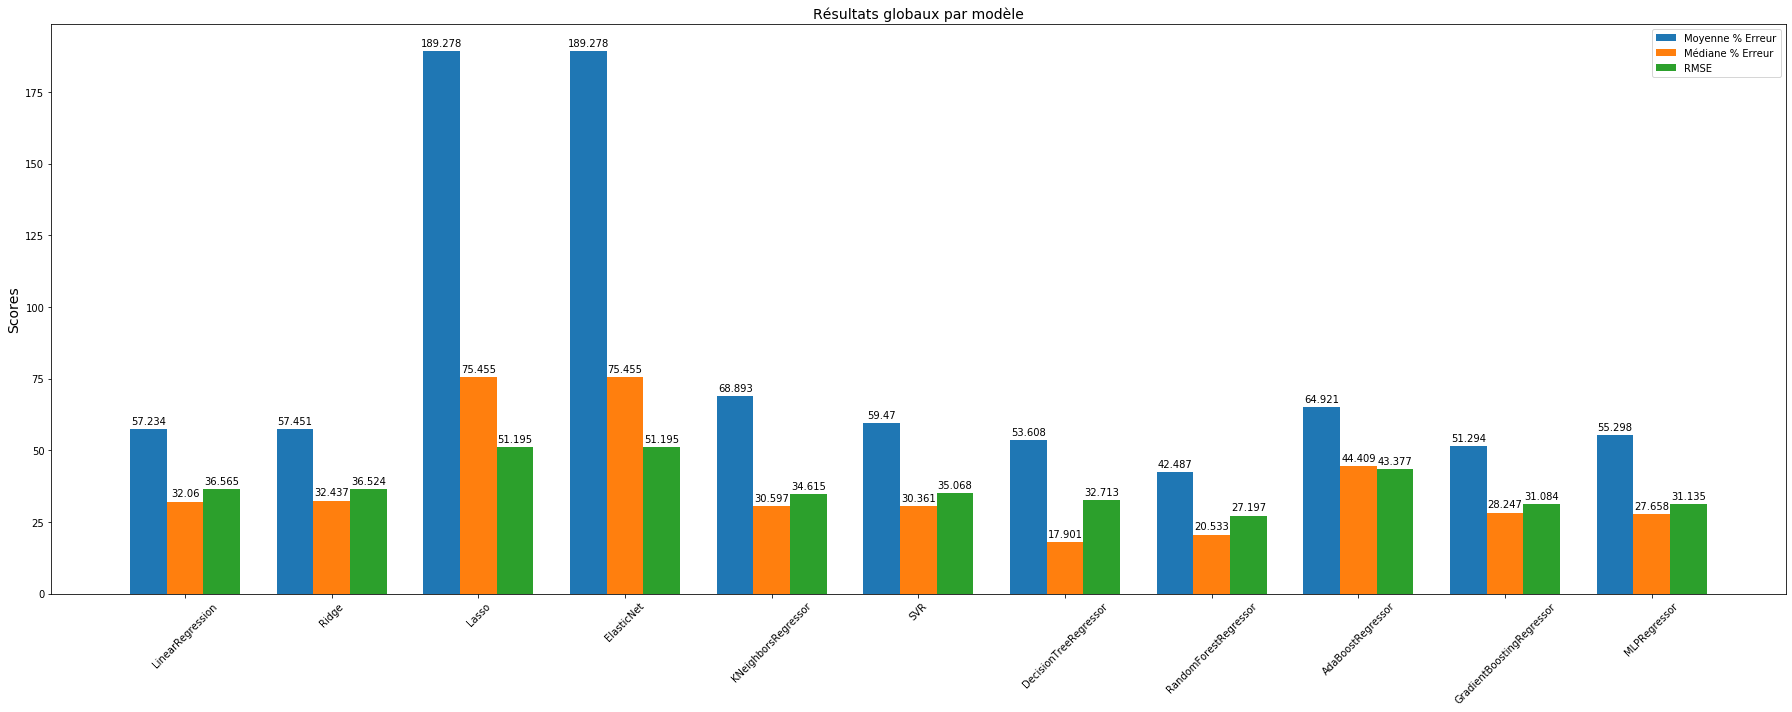

In [38]:
labels = df_analyse["Modeles"].unique()
    
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(25,10))
rects1 = ax.bar(x - width, df_analyse["mean_percent_err"], width, label='Moyenne % Erreur')
rects2 = ax.bar(x, df_analyse["median_percent_err"], width, label='Médiane % Erreur')
rects3 = ax.bar(x + width, df_analyse["RMSE"], width, label='RMSE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores', size=14)
ax.set_title('Résultats globaux par modèle', size=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

### Analyse des target

Analysons les targets, et comparons les aux scores calculés pour le meilleur modèle.

ANALYSE RANDOM FOREST REGRESSOR
-----------------------------------------
Nbr d'observations traitées : 1189
Valeur mini des valeurs réelles : 0.09
2e percentile des valeurs réelles : 7.78
3e percentile des valeurs réelles : 61.46
Valeur maxi des valeurs réelles : 209.92
-----------------------------------------
Moyenne des valeurs réelles : 43.695
-----------------------------------------
Médiane des valeurs réelles : 25.14


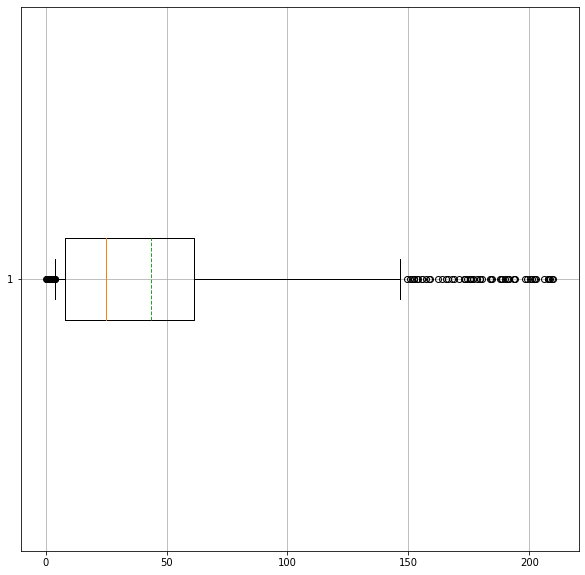

In [39]:
df_target = df_mean[df_mean["Modeles"] == "RandomForestRegressor"]["y_test"]

print("ANALYSE RANDOM FOREST REGRESSOR")
print("-----------------------------------------")
print("Nbr d'observations traitées :", df_target.shape[0])
print("Valeur mini des valeurs réelles :", round(df_target.min(),3))
print("2e percentile des valeurs réelles :", round(df_target.quantile(0.25),3))
print("3e percentile des valeurs réelles :", round(df_target.quantile(0.75),3))
print("Valeur maxi des valeurs réelles :", round(df_target.max(),3))
print("-----------------------------------------")
print("Moyenne des valeurs réelles :", round(df_target.mean(),3))
#print("RMSE :", df_analyse[df_analyse["Modeles"] =="RandomForestRegressor"]["RMSE"].values)
#print("Moyenne % erreurs :", df_analyse[df_analyse["Modeles"] =="RandomForestRegressor"]["mean_percent_err"].values)
print("-----------------------------------------")
print("Médiane des valeurs réelles :", round(df_target.median(),3))
#print("Médiane % erreurs :", df_analyse[df_analyse["Modeles"] =="RandomForestRegressor"]["median_percent_err"].values)

plt.figure(figsize=(10,10))
plt.boxplot(df_target,whis=[5,95], meanline=True, showmeans=True, vert=False)
plt.grid()


### Analyse des résultats des 3 modèles les plus prometteurs

 - Nous allons analyser les distributions des résultats des 3 meilleurs modèles afin de comprendre leurs dispersions.

 - Ensuite, nous effectuerons une segmentation des resultats par grandeur de target afin de comprendre plus en détail les performances de nos modèles. 

In [40]:
#Cette fonction permet de ressortir les 3 modèles les plus prometteurs

df_temp = df_analyse.sort_values(by="RMSE", ascending=True)

lst_meilleurs_modeles = df_temp.iloc[0:3,0]
lst_meilleurs_modeles = list(lst_meilleurs_modeles.values)
lst_meilleurs_modeles

['RandomForestRegressor', 'GradientBoostingRegressor', 'MLPRegressor']

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\pandas\core\series.py:4782: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)
C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\pandas\core\series.py:4782: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)
C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\pandas\core\series.py:4782: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

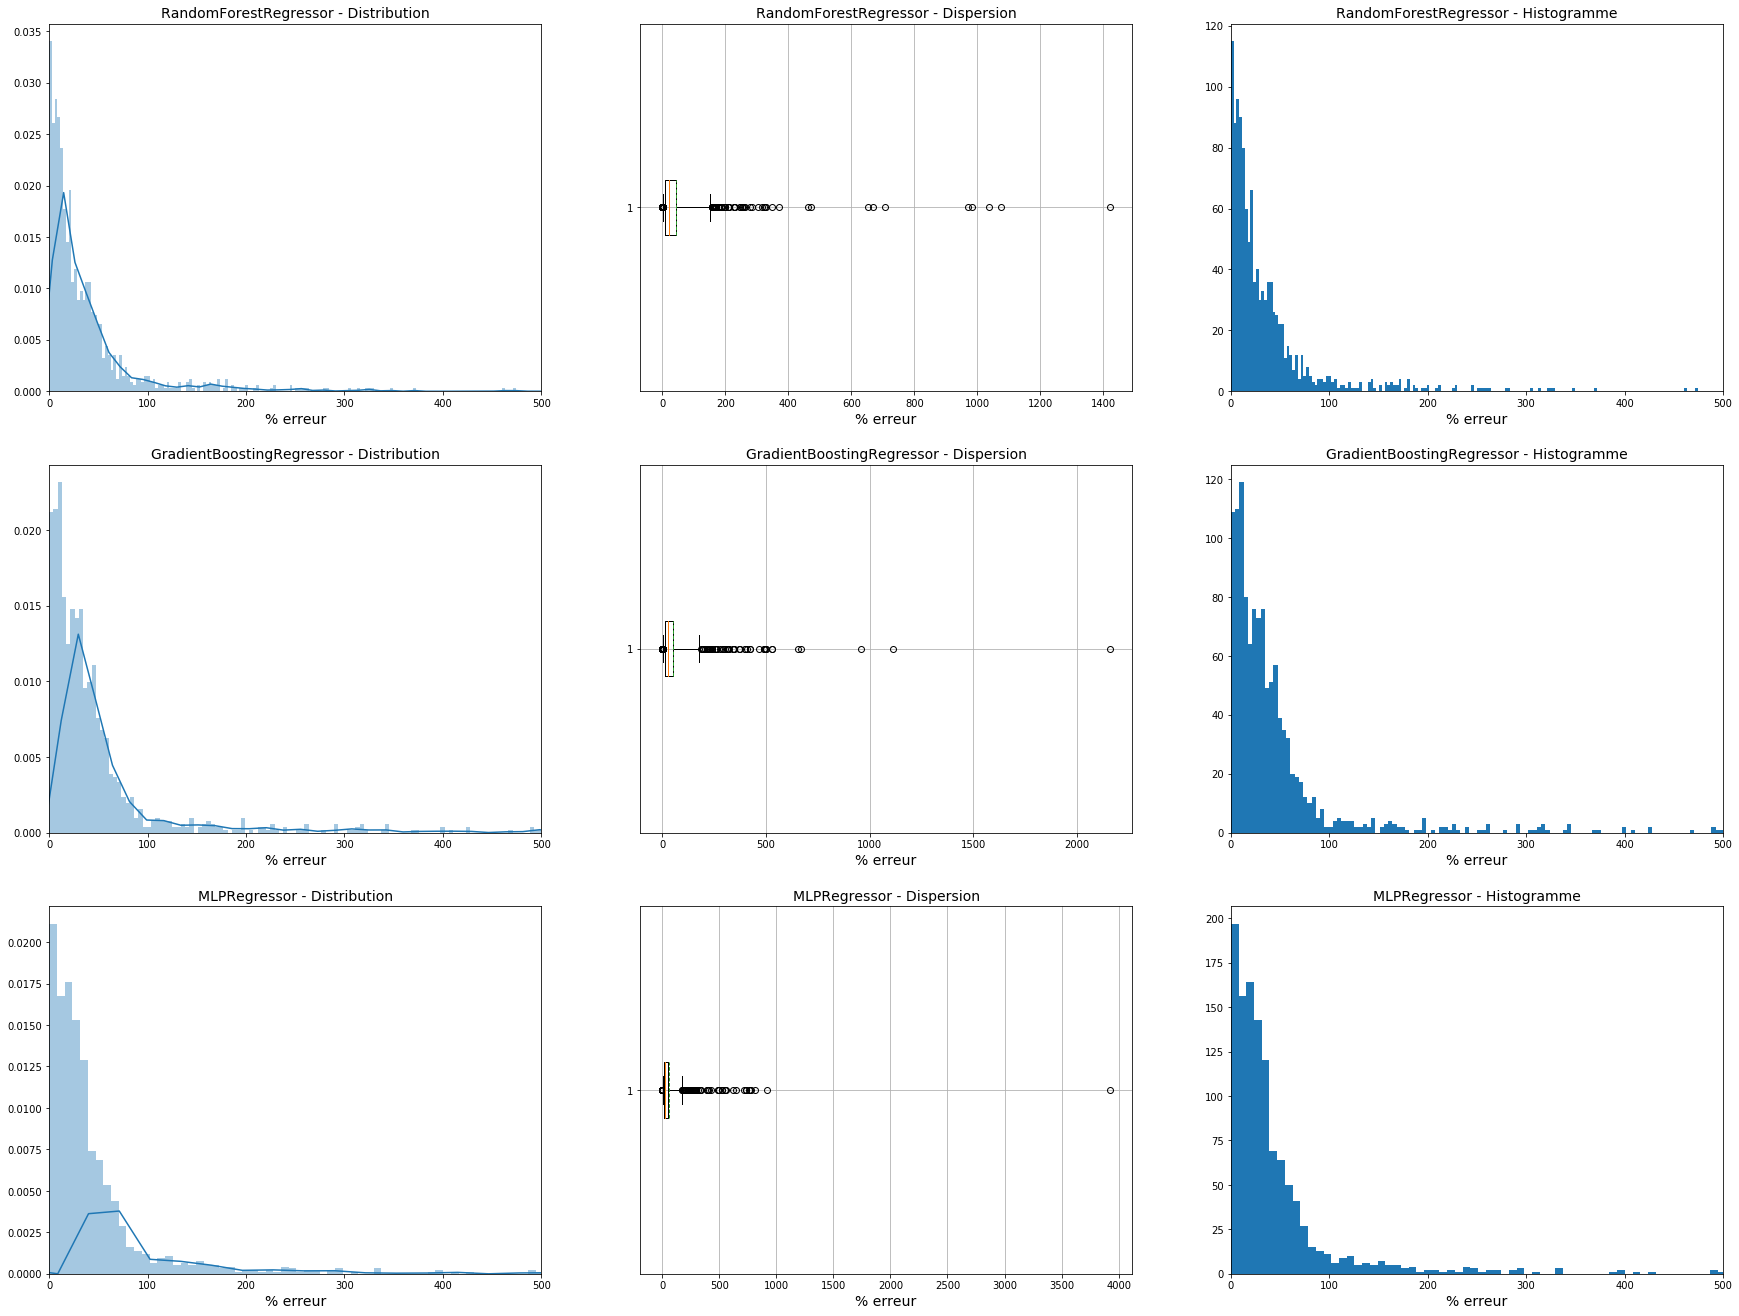

In [41]:
#Cette fonction crée 3 graphiques par modèle construit
import scipy.stats as stats

modeles = lst_meilleurs_modeles

nbr_lignes = len(modeles)
nbr_colonnes = 3
num_graph = 1

plt.subplots(figsize=(30, 23))

for modele in modeles:

    if num_graph <= nbr_lignes * nbr_colonnes:

        mydata = df_mean[df_mean["Modeles"] == modele]
        mydata = mydata["%error"]
        mydata.dropna(axis=0, inplace=True)

        plt.subplot(nbr_lignes,nbr_colonnes, num_graph)
        sns.distplot(mydata, kde=True, bins=500)
        plt.title(modele + " - Distribution",size=14)
        plt.xlabel('% erreur', size=14)
        plt.xlim(0,500)

        num_graph +=1

        plt.subplot(nbr_lignes,nbr_colonnes, num_graph)
        plt.boxplot(mydata,whis=[5,95], meanline=True, showmeans=True, vert=False)
        plt.grid()
        plt.title(modele + " - Dispersion",size=14)
        plt.xlabel('% erreur', size=14)
        
        num_graph +=1

        plt.subplot(nbr_lignes,nbr_colonnes, num_graph)

        #measurements = mydata.values()
        #stats.probplot(measurements, dist="norm", plot=plt)
        plt.hist(mydata, bins=500)
        plt.title(modele + " - Histogramme",size=14)
        plt.xlabel('% erreur', size=14)
        plt.xlim(0,500)
        
        num_graph +=1

plt.show()

### Analyse par tranche des résultats

Nous allons calculer les performances des modèles par tranche :
 - Tranche 1 : La population en-dessous du Q1
 - Tranche 2 : La population interquartile
 - Tranche 3 : La population au dessus du Q3

In [42]:
#Cette fonction crée 3 graphiques par modèle construit
import scipy.stats as stats

def analyse_resultats(tranche1, tranche2, tranche3, modele):

    nbr_lignes = 3
    nbr_colonnes = 3
    num_graph = 1

    plt.subplots(figsize=(30, 21))

    i=1
    while i <= nbr_lignes:

        if num_graph <= nbr_lignes * nbr_colonnes:
            
            if i==1:
                mydata = tranche1["%error"]
            elif i==2:
                mydata = tranche2["%error"]
            elif i==3:
                mydata = tranche3["%error"]
            
            
            plt.subplot(nbr_lignes,nbr_colonnes, num_graph)
            sns.distplot(mydata, kde=True, bins=500)
            titre = "Analyse % erreurs " + modele + " - Tranche " + str(i)
            plt.title(titre,size=14)
            plt.xlabel('% erreur', size=14)
            plt.xlim(0,500)

            num_graph +=1

            plt.subplot(nbr_lignes,nbr_colonnes, num_graph)
            plt.boxplot(mydata, meanline=True, showmeans=True, vert=False) #,whis=[5,95]
            plt.grid()
            plt.xlabel('% erreur', size=14)

            num_graph +=1

            plt.subplot(nbr_lignes,nbr_colonnes, num_graph)

            #measurements = mydata.values()
            #stats.probplot(measurements, dist="norm", plot=plt)
            plt.hist(mydata, bins=500)
            plt.xlabel('% erreur', size=14)
            plt.xlim(0,500)

            num_graph +=1
            
            i+=1
    plt.show()

Taille echantillon modèle RandomForestRegressor: 1189
RAPPEL RESULTATS GLOBAUX
Moyenne pourcentage erreur : 42.487310680738716
Médiane pourcentage erreur : 20.53344437165265
------------------------
TRANCHE 1
Taille tranche 1 : 297
Moyenne pourcentage erreur : 48.2712519681969
Médiane pourcentage erreur : 12.18177559490635
Erreur max : 1420.3769094471231
------------------------
TRANCHE 2
Taille tranche 2 : 595
Moyenne pourcentage erreur : 45.40508067066664
Médiane pourcentage erreur : 21.560219120498658
Erreur max : 1074.3808529915332
------------------------
TRANCHE 3
Taille tranche 3 : 297
Moyenne pourcentage erreur : 30.85800527204444
Médiane pourcentage erreur : 27.79895615760713
Erreur max : 100.4583154411016


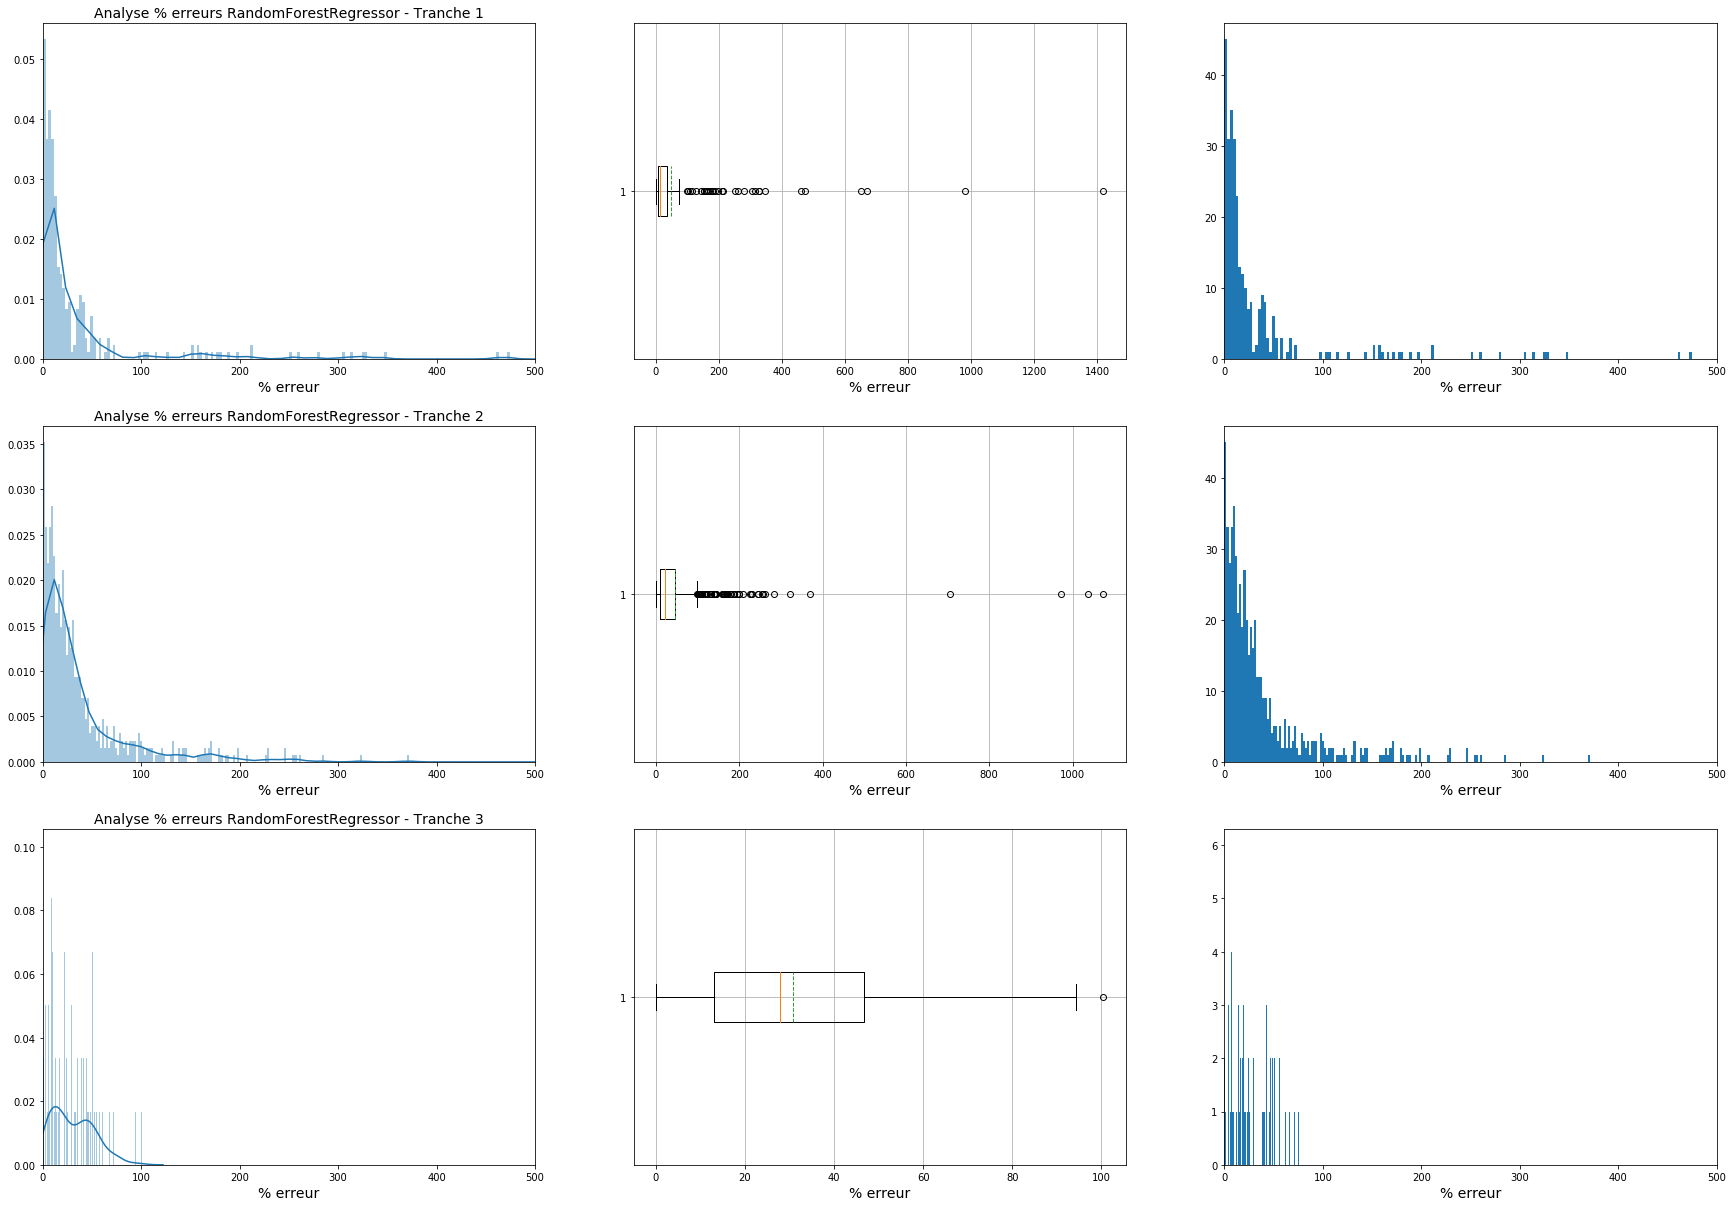

Taille echantillon modèle GradientBoostingRegressor: 1189
RAPPEL RESULTATS GLOBAUX
Moyenne pourcentage erreur : 51.29379373672764
Médiane pourcentage erreur : 28.24723208649602
------------------------
TRANCHE 1
Taille tranche 1 : 297
Moyenne pourcentage erreur : 70.68485733377663
Médiane pourcentage erreur : 15.817029572843726
Erreur max : 2159.686296498304
------------------------
TRANCHE 2
Taille tranche 2 : 595
Moyenne pourcentage erreur : 48.44105436806503
Médiane pourcentage erreur : 28.751428008871414
Erreur max : 498.94301816042605
------------------------
TRANCHE 3
Taille tranche 3 : 297
Moyenne pourcentage erreur : 37.61781406006335
Médiane pourcentage erreur : 38.108673480663704
Erreur max : 105.5153966857263


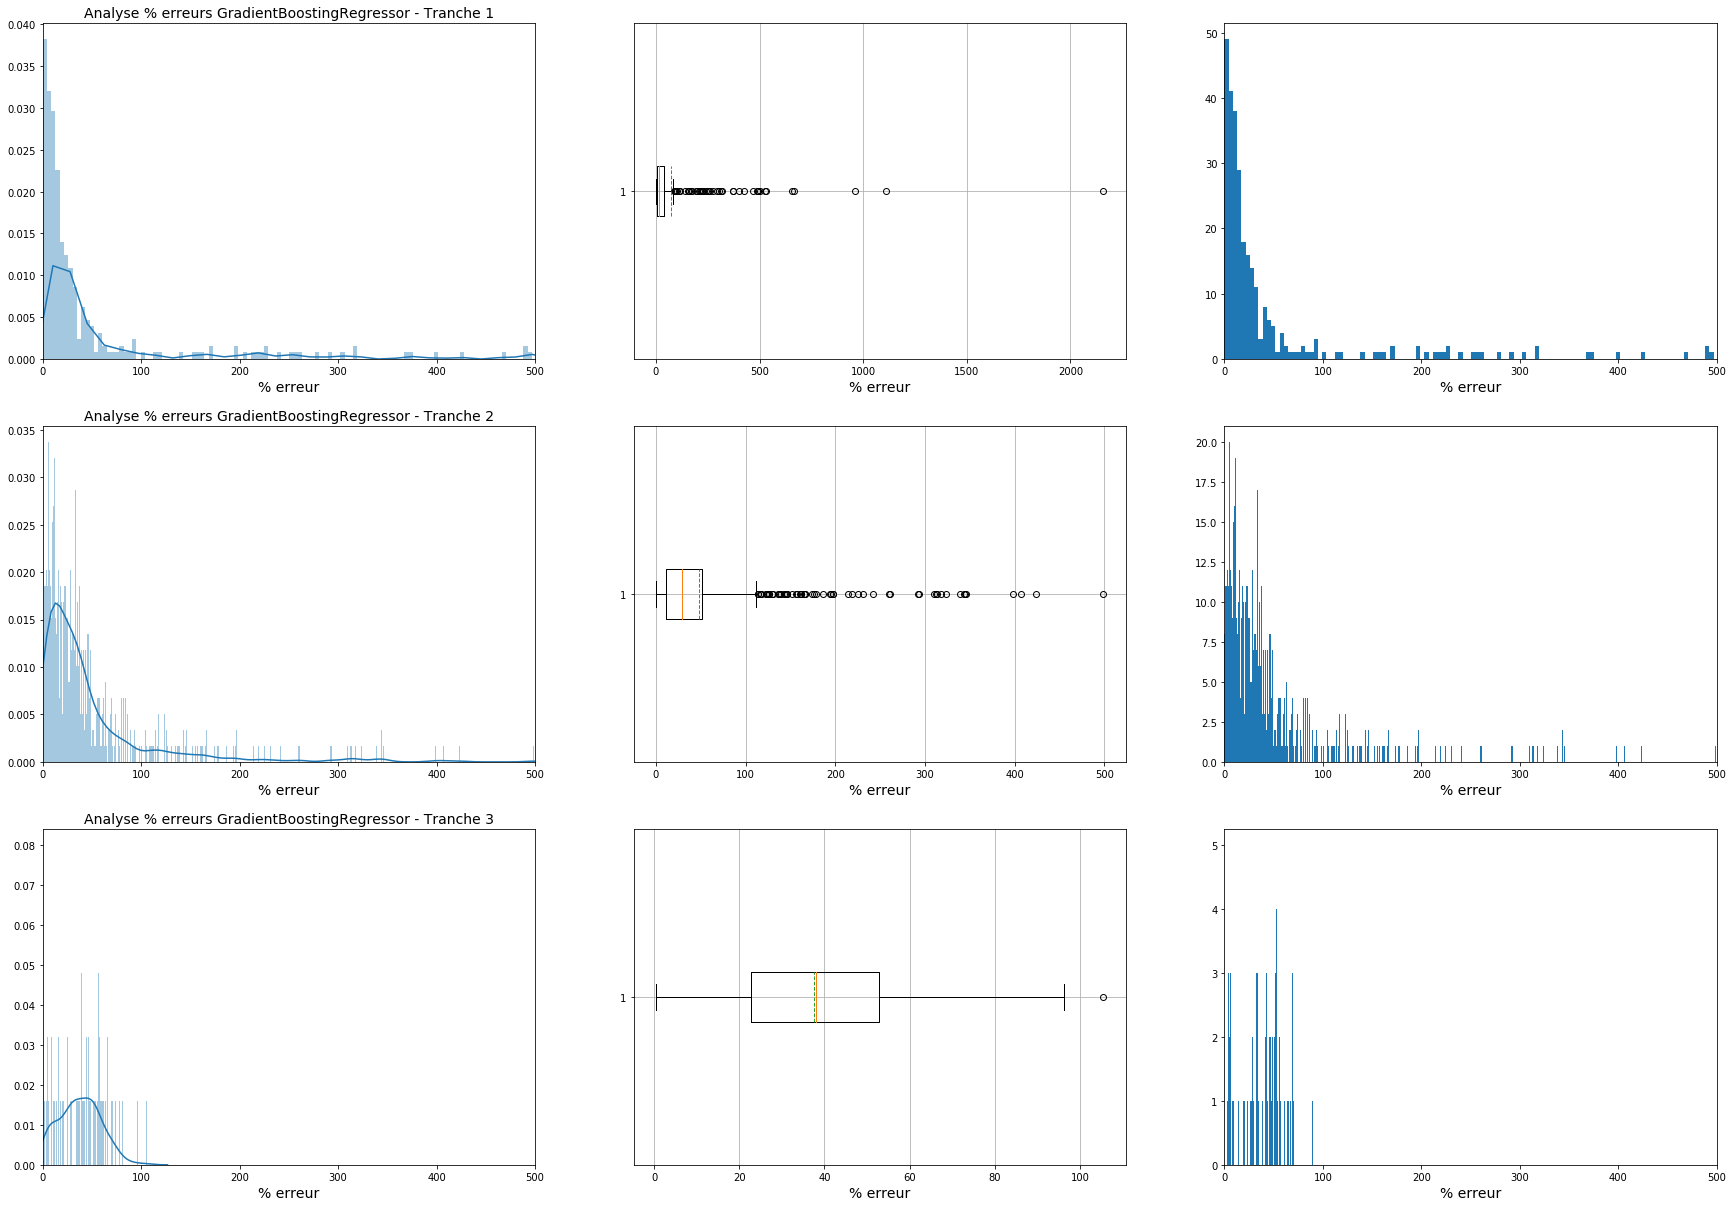

Taille echantillon modèle MLPRegressor: 1189
RAPPEL RESULTATS GLOBAUX
Moyenne pourcentage erreur : 55.298203316948346
Médiane pourcentage erreur : 27.657555199876732
------------------------
TRANCHE 1
Taille tranche 1 : 297
Moyenne pourcentage erreur : 76.48796465134012
Médiane pourcentage erreur : 21.56365277688289
Erreur max : 3923.3981703914346
------------------------
TRANCHE 2
Taille tranche 2 : 595
Moyenne pourcentage erreur : 55.17161263010057
Médiane pourcentage erreur : 28.55420093367497
Erreur max : 762.6895688227168
------------------------
TRANCHE 3
Taille tranche 3 : 297
Moyenne pourcentage erreur : 34.36204958752095
Médiane pourcentage erreur : 31.60636257920466
Erreur max : 167.89105147461422


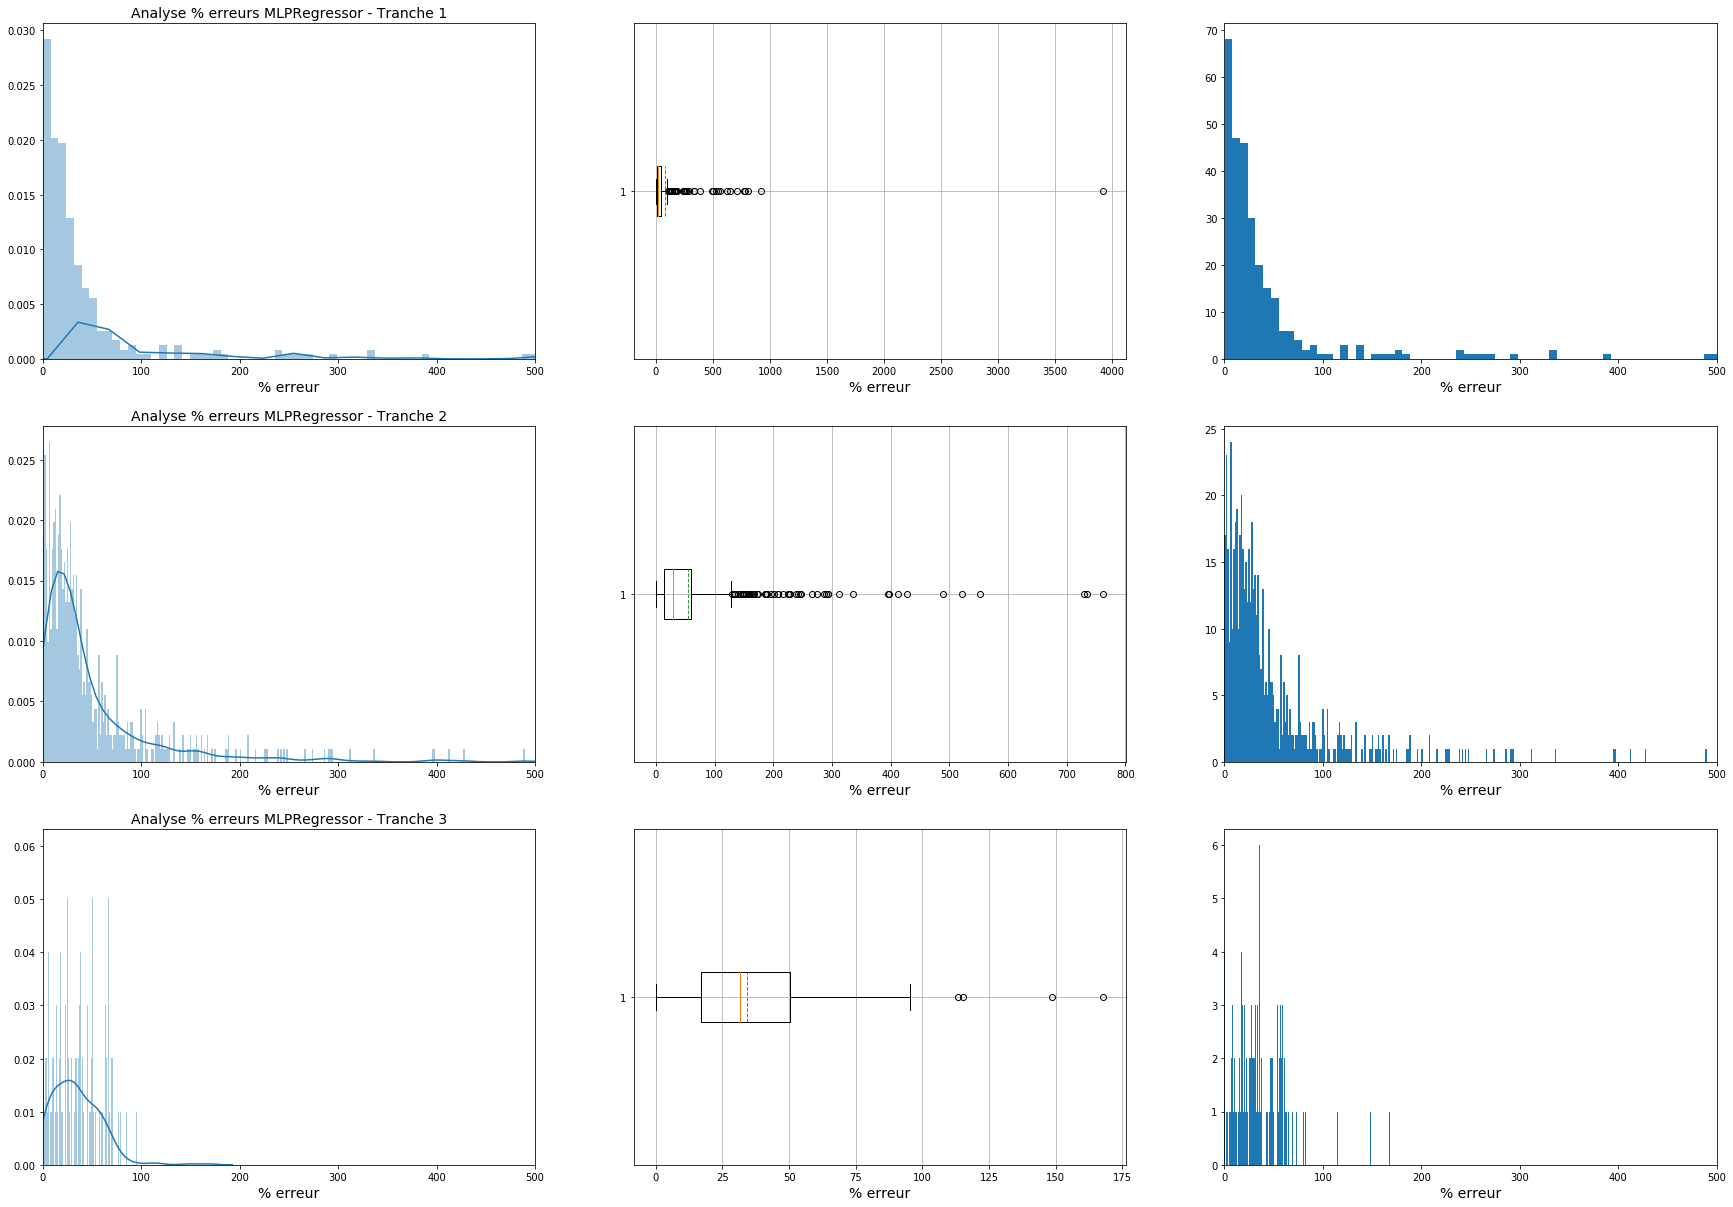

In [43]:
#Extraction des données par tranche et par modèle

#On commence par extraire les modèles

for modele in lst_meilleurs_modeles:
    
    df_temp = df_mean[df_mean["Modeles"] == modele]
    df_temp = pd.DataFrame(df_temp)

    print("Taille echantillon modèle {}: {}".format(modele, df_temp.shape[0]))
    
    val_percentile_25 = df_temp["y_test"].quantile(0.25)
    val_percentile_75 = df_temp["y_test"].quantile(0.75)
    
    df_tranche1 = df_temp[df_temp["y_test"] < val_percentile_25]
    df_tranche2 = df_temp[(df_temp["y_test"] >= val_percentile_25) & (df_temp["y_test"] <= val_percentile_75)]
    df_tranche3 = df_temp[df_temp["y_test"] > val_percentile_75]
        
    print("RAPPEL RESULTATS GLOBAUX")
    print("Moyenne pourcentage erreur :", df_temp["%error"].mean())
    print("Médiane pourcentage erreur :", df_temp["%error"].median())
    print("------------------------")
    print("TRANCHE 1")
    print("Taille tranche 1 :", df_tranche1.shape[0])
    print("Moyenne pourcentage erreur :", df_tranche1["%error"].mean())
    print("Médiane pourcentage erreur :", df_tranche1["%error"].median())
    print("Erreur max :", df_tranche1["%error"].max())
    print("------------------------")
    print("TRANCHE 2")
    print("Taille tranche 2 :", df_tranche2.shape[0])
    print("Moyenne pourcentage erreur :", df_tranche2["%error"].mean())
    print("Médiane pourcentage erreur :", df_tranche2["%error"].median())
    print("Erreur max :", df_tranche2["%error"].max())
    print("------------------------")
    print("TRANCHE 3")
    print("Taille tranche 3 :", df_tranche3.shape[0])
    print("Moyenne pourcentage erreur :", df_tranche3["%error"].mean())
    print("Médiane pourcentage erreur :", df_tranche3["%error"].median())
    print("Erreur max :", df_tranche3["%error"].max())
    
    
    analyse_resultats(df_tranche1, df_tranche2, df_tranche3, modele)

# ENTRAINEMENT DES MODELES - ETAPE 2

Entrainement des modèles sur des données non filtrées (sans suppression d'outliers).

In [44]:
%%time

#LANCEMENT DE LA MODELISATION
target = "TotalEmissionGES"
#target = "SiteEnergyUse(kBtu)"

#ETAPE 2 : MODELISATION SANS FILTRAGE
#Modélisation en 10 étapes pour vérification en validation croisée
#Chargement des modèles
regressors = prep_modelisation2(2)

#On prépare le taleau de synthèse
df_results = pd.DataFrame(columns=["Modeles", "y_test", "y_pred", "RMSE", "y_test-y_pred", "abs(y_test-y_pred)", "%error"])

i=1
nb_passes = 10
while i <= nb_passes:
    
    print("Passe n°", i)
    
    #Préprocessing
    X_train, X_test, y_train, y_test = pipeline_preprocessing(data, target, 2)
    
    #Entrainement des modèles
    df_temp = modelisation2(X_train, X_test, y_train, y_test, regressors)
    
    df_results = pd.concat([df_results, df_temp], sort=False)
                                    
    i+=1

print("Mise en forme des résultats")
df_synthese = synthese_resultats(df_results)


Passe n° 1
6716 observations initiales
6669 après suppressions outliers
Encodage : 0 | Modalité : ['BALLARD'] | Nbr observations : 254 | Pourcentage : 3.81 %
Encodage : 1 | Modalité : ['CENTRAL'] | Nbr observations : 232 | Pourcentage : 3.48 %
Encodage : 2 | Modalité : ['DELRIDGE'] | Nbr observations : 164 | Pourcentage : 2.46 %
Encodage : 3 | Modalité : ['DOWNTOWN'] | Nbr observations : 1145 | Pourcentage : 17.17 %
Encodage : 4 | Modalité : ['EAST'] | Nbr observations : 896 | Pourcentage : 13.44 %
Encodage : 5 | Modalité : ['GREATER DUWAMISH'] | Nbr observations : 744 | Pourcentage : 11.16 %
Encodage : 6 | Modalité : ['LAKE UNION'] | Nbr observations : 497 | Pourcentage : 7.45 %
Encodage : 7 | Modalité : ['MAGNOLIA / QUEEN ANNE'] | Nbr observations : 836 | Pourcentage : 12.54 %
Encodage : 8 | Modalité : ['NORTH'] | Nbr observations : 330 | Pourcentage : 4.95 %
Encodage : 9 | Modalité : ['NORTHEAST'] | Nbr observations : 533 | Pourcentage : 7.99 %
Encodage : 10 | Modalité : ['NORTHWEST

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Passe n° 2
6716 observations initiales
6669 après suppressions outliers
Encodage : 0 | Modalité : ['BALLARD'] | Nbr observations : 254 | Pourcentage : 3.81 %
Encodage : 1 | Modalité : ['CENTRAL'] | Nbr observations : 232 | Pourcentage : 3.48 %
Encodage : 2 | Modalité : ['DELRIDGE'] | Nbr observations : 164 | Pourcentage : 2.46 %
Encodage : 3 | Modalité : ['DOWNTOWN'] | Nbr observations : 1145 | Pourcentage : 17.17 %
Encodage : 4 | Modalité : ['EAST'] | Nbr observations : 896 | Pourcentage : 13.44 %
Encodage : 5 | Modalité : ['GREATER DUWAMISH'] | Nbr observations : 744 | Pourcentage : 11.16 %
Encodage : 6 | Modalité : ['LAKE UNION'] | Nbr observations : 497 | Pourcentage : 7.45 %
Encodage : 7 | Modalité : ['MAGNOLIA / QUEEN ANNE'] | Nbr observations : 836 | Pourcentage : 12.54 %
Encodage : 8 | Modalité : ['NORTH'] | Nbr observations : 330 | Pourcentage : 4.95 %
Encodage : 9 | Modalité : ['NORTHEAST'] | Nbr observations : 533 | Pourcentage : 7.99 %
Encodage : 10 | Modalité : ['NORTHWEST

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Passe n° 3
6716 observations initiales
6669 après suppressions outliers
Encodage : 0 | Modalité : ['BALLARD'] | Nbr observations : 254 | Pourcentage : 3.81 %
Encodage : 1 | Modalité : ['CENTRAL'] | Nbr observations : 232 | Pourcentage : 3.48 %
Encodage : 2 | Modalité : ['DELRIDGE'] | Nbr observations : 164 | Pourcentage : 2.46 %
Encodage : 3 | Modalité : ['DOWNTOWN'] | Nbr observations : 1145 | Pourcentage : 17.17 %
Encodage : 4 | Modalité : ['EAST'] | Nbr observations : 896 | Pourcentage : 13.44 %
Encodage : 5 | Modalité : ['GREATER DUWAMISH'] | Nbr observations : 744 | Pourcentage : 11.16 %
Encodage : 6 | Modalité : ['LAKE UNION'] | Nbr observations : 497 | Pourcentage : 7.45 %
Encodage : 7 | Modalité : ['MAGNOLIA / QUEEN ANNE'] | Nbr observations : 836 | Pourcentage : 12.54 %
Encodage : 8 | Modalité : ['NORTH'] | Nbr observations : 330 | Pourcentage : 4.95 %
Encodage : 9 | Modalité : ['NORTHEAST'] | Nbr observations : 533 | Pourcentage : 7.99 %
Encodage : 10 | Modalité : ['NORTHWEST

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Passe n° 4
6716 observations initiales
6669 après suppressions outliers
Encodage : 0 | Modalité : ['BALLARD'] | Nbr observations : 254 | Pourcentage : 3.81 %
Encodage : 1 | Modalité : ['CENTRAL'] | Nbr observations : 232 | Pourcentage : 3.48 %
Encodage : 2 | Modalité : ['DELRIDGE'] | Nbr observations : 164 | Pourcentage : 2.46 %
Encodage : 3 | Modalité : ['DOWNTOWN'] | Nbr observations : 1145 | Pourcentage : 17.17 %
Encodage : 4 | Modalité : ['EAST'] | Nbr observations : 896 | Pourcentage : 13.44 %
Encodage : 5 | Modalité : ['GREATER DUWAMISH'] | Nbr observations : 744 | Pourcentage : 11.16 %
Encodage : 6 | Modalité : ['LAKE UNION'] | Nbr observations : 497 | Pourcentage : 7.45 %
Encodage : 7 | Modalité : ['MAGNOLIA / QUEEN ANNE'] | Nbr observations : 836 | Pourcentage : 12.54 %
Encodage : 8 | Modalité : ['NORTH'] | Nbr observations : 330 | Pourcentage : 4.95 %
Encodage : 9 | Modalité : ['NORTHEAST'] | Nbr observations : 533 | Pourcentage : 7.99 %
Encodage : 10 | Modalité : ['NORTHWEST

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Passe n° 5
6716 observations initiales
6669 après suppressions outliers
Encodage : 0 | Modalité : ['BALLARD'] | Nbr observations : 254 | Pourcentage : 3.81 %
Encodage : 1 | Modalité : ['CENTRAL'] | Nbr observations : 232 | Pourcentage : 3.48 %
Encodage : 2 | Modalité : ['DELRIDGE'] | Nbr observations : 164 | Pourcentage : 2.46 %
Encodage : 3 | Modalité : ['DOWNTOWN'] | Nbr observations : 1145 | Pourcentage : 17.17 %
Encodage : 4 | Modalité : ['EAST'] | Nbr observations : 896 | Pourcentage : 13.44 %
Encodage : 5 | Modalité : ['GREATER DUWAMISH'] | Nbr observations : 744 | Pourcentage : 11.16 %
Encodage : 6 | Modalité : ['LAKE UNION'] | Nbr observations : 497 | Pourcentage : 7.45 %
Encodage : 7 | Modalité : ['MAGNOLIA / QUEEN ANNE'] | Nbr observations : 836 | Pourcentage : 12.54 %
Encodage : 8 | Modalité : ['NORTH'] | Nbr observations : 330 | Pourcentage : 4.95 %
Encodage : 9 | Modalité : ['NORTHEAST'] | Nbr observations : 533 | Pourcentage : 7.99 %
Encodage : 10 | Modalité : ['NORTHWEST

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Passe n° 6
6716 observations initiales
6669 après suppressions outliers
Encodage : 0 | Modalité : ['BALLARD'] | Nbr observations : 254 | Pourcentage : 3.81 %
Encodage : 1 | Modalité : ['CENTRAL'] | Nbr observations : 232 | Pourcentage : 3.48 %
Encodage : 2 | Modalité : ['DELRIDGE'] | Nbr observations : 164 | Pourcentage : 2.46 %
Encodage : 3 | Modalité : ['DOWNTOWN'] | Nbr observations : 1145 | Pourcentage : 17.17 %
Encodage : 4 | Modalité : ['EAST'] | Nbr observations : 896 | Pourcentage : 13.44 %
Encodage : 5 | Modalité : ['GREATER DUWAMISH'] | Nbr observations : 744 | Pourcentage : 11.16 %
Encodage : 6 | Modalité : ['LAKE UNION'] | Nbr observations : 497 | Pourcentage : 7.45 %
Encodage : 7 | Modalité : ['MAGNOLIA / QUEEN ANNE'] | Nbr observations : 836 | Pourcentage : 12.54 %
Encodage : 8 | Modalité : ['NORTH'] | Nbr observations : 330 | Pourcentage : 4.95 %
Encodage : 9 | Modalité : ['NORTHEAST'] | Nbr observations : 533 | Pourcentage : 7.99 %
Encodage : 10 | Modalité : ['NORTHWEST

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Passe n° 7
6716 observations initiales
6669 après suppressions outliers
Encodage : 0 | Modalité : ['BALLARD'] | Nbr observations : 254 | Pourcentage : 3.81 %
Encodage : 1 | Modalité : ['CENTRAL'] | Nbr observations : 232 | Pourcentage : 3.48 %
Encodage : 2 | Modalité : ['DELRIDGE'] | Nbr observations : 164 | Pourcentage : 2.46 %
Encodage : 3 | Modalité : ['DOWNTOWN'] | Nbr observations : 1145 | Pourcentage : 17.17 %
Encodage : 4 | Modalité : ['EAST'] | Nbr observations : 896 | Pourcentage : 13.44 %
Encodage : 5 | Modalité : ['GREATER DUWAMISH'] | Nbr observations : 744 | Pourcentage : 11.16 %
Encodage : 6 | Modalité : ['LAKE UNION'] | Nbr observations : 497 | Pourcentage : 7.45 %
Encodage : 7 | Modalité : ['MAGNOLIA / QUEEN ANNE'] | Nbr observations : 836 | Pourcentage : 12.54 %
Encodage : 8 | Modalité : ['NORTH'] | Nbr observations : 330 | Pourcentage : 4.95 %
Encodage : 9 | Modalité : ['NORTHEAST'] | Nbr observations : 533 | Pourcentage : 7.99 %
Encodage : 10 | Modalité : ['NORTHWEST

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Passe n° 8
6716 observations initiales
6669 après suppressions outliers
Encodage : 0 | Modalité : ['BALLARD'] | Nbr observations : 254 | Pourcentage : 3.81 %
Encodage : 1 | Modalité : ['CENTRAL'] | Nbr observations : 232 | Pourcentage : 3.48 %
Encodage : 2 | Modalité : ['DELRIDGE'] | Nbr observations : 164 | Pourcentage : 2.46 %
Encodage : 3 | Modalité : ['DOWNTOWN'] | Nbr observations : 1145 | Pourcentage : 17.17 %
Encodage : 4 | Modalité : ['EAST'] | Nbr observations : 896 | Pourcentage : 13.44 %
Encodage : 5 | Modalité : ['GREATER DUWAMISH'] | Nbr observations : 744 | Pourcentage : 11.16 %
Encodage : 6 | Modalité : ['LAKE UNION'] | Nbr observations : 497 | Pourcentage : 7.45 %
Encodage : 7 | Modalité : ['MAGNOLIA / QUEEN ANNE'] | Nbr observations : 836 | Pourcentage : 12.54 %
Encodage : 8 | Modalité : ['NORTH'] | Nbr observations : 330 | Pourcentage : 4.95 %
Encodage : 9 | Modalité : ['NORTHEAST'] | Nbr observations : 533 | Pourcentage : 7.99 %
Encodage : 10 | Modalité : ['NORTHWEST

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Passe n° 9
6716 observations initiales
6669 après suppressions outliers
Encodage : 0 | Modalité : ['BALLARD'] | Nbr observations : 254 | Pourcentage : 3.81 %
Encodage : 1 | Modalité : ['CENTRAL'] | Nbr observations : 232 | Pourcentage : 3.48 %
Encodage : 2 | Modalité : ['DELRIDGE'] | Nbr observations : 164 | Pourcentage : 2.46 %
Encodage : 3 | Modalité : ['DOWNTOWN'] | Nbr observations : 1145 | Pourcentage : 17.17 %
Encodage : 4 | Modalité : ['EAST'] | Nbr observations : 896 | Pourcentage : 13.44 %
Encodage : 5 | Modalité : ['GREATER DUWAMISH'] | Nbr observations : 744 | Pourcentage : 11.16 %
Encodage : 6 | Modalité : ['LAKE UNION'] | Nbr observations : 497 | Pourcentage : 7.45 %
Encodage : 7 | Modalité : ['MAGNOLIA / QUEEN ANNE'] | Nbr observations : 836 | Pourcentage : 12.54 %
Encodage : 8 | Modalité : ['NORTH'] | Nbr observations : 330 | Pourcentage : 4.95 %
Encodage : 9 | Modalité : ['NORTHEAST'] | Nbr observations : 533 | Pourcentage : 7.99 %
Encodage : 10 | Modalité : ['NORTHWEST

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Passe n° 10
6716 observations initiales
6669 après suppressions outliers
Encodage : 0 | Modalité : ['BALLARD'] | Nbr observations : 254 | Pourcentage : 3.81 %
Encodage : 1 | Modalité : ['CENTRAL'] | Nbr observations : 232 | Pourcentage : 3.48 %
Encodage : 2 | Modalité : ['DELRIDGE'] | Nbr observations : 164 | Pourcentage : 2.46 %
Encodage : 3 | Modalité : ['DOWNTOWN'] | Nbr observations : 1145 | Pourcentage : 17.17 %
Encodage : 4 | Modalité : ['EAST'] | Nbr observations : 896 | Pourcentage : 13.44 %
Encodage : 5 | Modalité : ['GREATER DUWAMISH'] | Nbr observations : 744 | Pourcentage : 11.16 %
Encodage : 6 | Modalité : ['LAKE UNION'] | Nbr observations : 497 | Pourcentage : 7.45 %
Encodage : 7 | Modalité : ['MAGNOLIA / QUEEN ANNE'] | Nbr observations : 836 | Pourcentage : 12.54 %
Encodage : 8 | Modalité : ['NORTH'] | Nbr observations : 330 | Pourcentage : 4.95 %
Encodage : 9 | Modalité : ['NORTHEAST'] | Nbr observations : 533 | Pourcentage : 7.99 %
Encodage : 10 | Modalité : ['NORTHWES

C:\Users\julie\Anaconda\envs\Projet 4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [45]:
#Création d'un tableau avec les moyennes des valeurs collectées à chaque passe
lst_modeles = df_results["Modeles"].unique()

df_mean = pd.DataFrame()

for modele in lst_modeles:
    
    df_temp = df_results[df_results["Modeles"] == modele]
    df_temp = df_temp.groupby(df_temp.index, as_index=False).mean()
    df_temp.insert(0,"Modeles", modele)
    df_mean = pd.concat([df_mean, df_temp], sort=False)

In [46]:
#Création d'un tableau avec les résultats moyens de chaque modèle
lst_modeles = df_mean["Modeles"].unique()

rmse = []
mean_percent_err = []
median_percent_err = []
r2 = []

df_analyse = pd.DataFrame()


for modele in lst_modeles:
    
    df_temp = df_mean[df_mean["Modeles"] == modele]
    
    rmse.append(round(df_temp["RMSE"].mean(),3))
    mean_percent_err.append(round(df_temp["%error"].mean(),3))
    median_percent_err.append(round(df_temp["%error"].median(),3))
    r2.append(round(r2_score(df_temp["y_test"], df_temp["y_pred"]),3))
    
df_analyse["Modeles"] = lst_modeles  
df_analyse["RMSE"] = rmse
df_analyse["mean_percent_err"] = mean_percent_err
df_analyse["median_percent_err"] = median_percent_err
df_analyse["r2"] = r2

In [47]:
df_analyse

,Modeles,RMSE,mean_percent_err,median_percent_err,r2
0,RandomForestRegressor,335.222,41.991,23.410,0.566
1,GradientBoostingRegressor,343.753,55.224,30.850,0.544
2,MLPRegressor,365.563,59.427,33.062,0.484


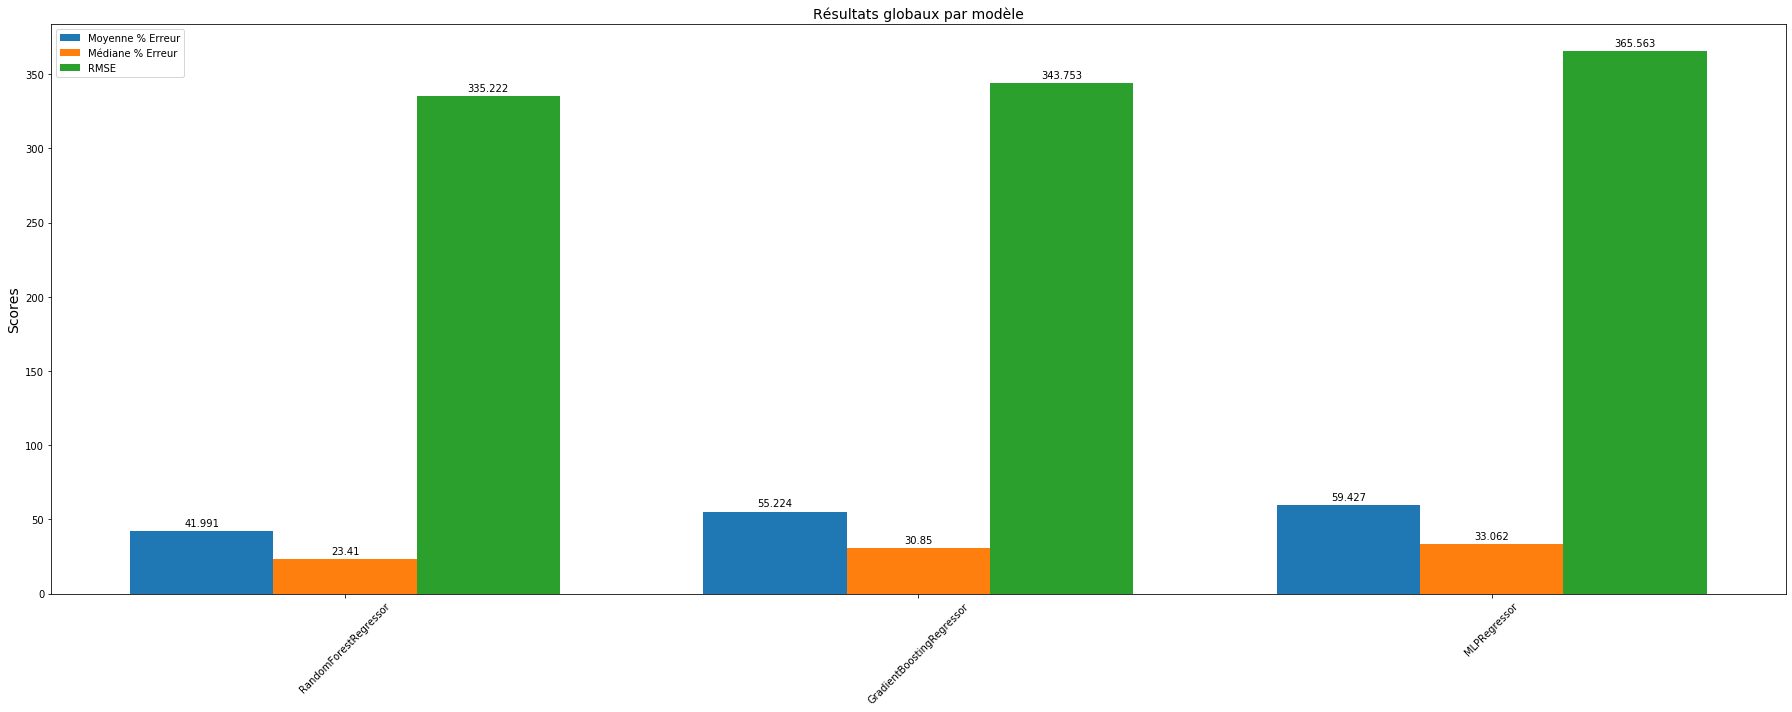

In [48]:
labels = df_analyse["Modeles"].unique()
    
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(25,10))
rects1 = ax.bar(x - width, df_analyse["mean_percent_err"], width, label='Moyenne % Erreur')
rects2 = ax.bar(x, df_analyse["median_percent_err"], width, label='Médiane % Erreur')
rects3 = ax.bar(x + width, df_analyse["RMSE"], width, label='RMSE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores', size=14)
ax.set_title('Résultats globaux par modèle', size=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

# OPTIMISATION DES MODELES

Nous sélectionnons les 3 meilleurs modèles avec les paramètres par défauts, et allons tenter de les optimiser avec une Recherche par quadrillage en validation croisée.

 - La forêt aléatoire :
     - Nombre d'arbres qui composent la forêt
     - Nombre de variables à considérer
     - Profondeur de l'arbre
     - min_samples_split : Le nombre minimum d’échantillons requis pour scinder un nœud interne
     
     
 - Le réseau de neurones | Multi-layer Perceptron regressor | Perceptron multi-couches
     - alpha : paramètre de régulation
     - Nbr de neurones dans chaque couche
     - learning_rate : taux d'apprentissage pour les mises à jour de poids
     - solver : la méthode d'optimisation du poids
     
     
 - Le Gradient Boosting Regressor
     - n_estimators : Nbr d'étape de boosting a effectuer
     - max_depth : profondeur maximale des estimateurs de régression individuels
     - min_samples_split : Le nombre minimum d’échantillons requis pour scinder un nœud interne
     - learning_rate : regulation de la contribution de chaque arbre
     - loss : fonction de perte

In [49]:
def results_optim(y_test, y_pred):
    
    #Résultats
    #Création du tableau de résultats
    df1 = pd.DataFrame(y_pred)
    df2 = y_test.reset_index()
    #On concatène les prédictions et les vraies valeurs en les passant à l'exponentielle car les valeurs sont en log
    df3 = pd.concat([np.exp(df2), np.exp(df1)], axis=1, sort=False)
    df3.columns = ["index", "y_test", "y_pred"]
    df3.drop("index", axis=1, inplace=True)

    rmse = (np.sqrt(mean_squared_error(df3["y_test"], df3["y_pred"])))
    r2 = r2_score(df3["y_test"], df3["y_pred"])
    print("RMSE: %.3f" % rmse)
    print("Score R²: %.3f" % r2)

In [50]:
#ETAPE 3 : OPTIMISATION DES MODELES

#Chargement des modèles
#regressors, df_R2, df_RMSE_log, df_RMSE_exp = prep_modelisation(1)
    
#Préprocessing
X_train, X_test, y_train, y_test = pipeline_preprocessing(data, target, 1)

nb_passes = 5


6716 observations initiales
5941 après suppressions outliers
Encodage : 0 | Modalité : ['BALLARD'] | Nbr observations : 234 | Pourcentage : 3.94 %
Encodage : 1 | Modalité : ['CENTRAL'] | Nbr observations : 219 | Pourcentage : 3.69 %
Encodage : 2 | Modalité : ['DELRIDGE'] | Nbr observations : 151 | Pourcentage : 2.54 %
Encodage : 3 | Modalité : ['DOWNTOWN'] | Nbr observations : 877 | Pourcentage : 14.76 %
Encodage : 4 | Modalité : ['EAST'] | Nbr observations : 799 | Pourcentage : 13.45 %
Encodage : 5 | Modalité : ['GREATER DUWAMISH'] | Nbr observations : 706 | Pourcentage : 11.88 %
Encodage : 6 | Modalité : ['LAKE UNION'] | Nbr observations : 422 | Pourcentage : 7.1 %
Encodage : 7 | Modalité : ['MAGNOLIA / QUEEN ANNE'] | Nbr observations : 779 | Pourcentage : 13.11 %
Encodage : 8 | Modalité : ['NORTH'] | Nbr observations : 306 | Pourcentage : 5.15 %
Encodage : 9 | Modalité : ['NORTHEAST'] | Nbr observations : 495 | Pourcentage : 8.33 %
Encodage : 10 | Modalité : ['NORTHWEST'] | Nbr obse

In [51]:
%%time
#RANDOM FOREST REGRESSOR
#Paramétrage
param_grid_forest = [{ 
'n_estimators': [10, 100, 200, 500],
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8,9,10],
'min_samples_split': [2,3,4], 
"random_state" : [0]
}]

print("RandomForestRegressor")
CV_forest = GridSearchCV(RandomForestRegressor(), param_grid_forest, cv=nb_passes, n_jobs=-1)
CV_forest.fit(X_train, y_train.values.ravel())

#Prédictions
y_pred = CV_forest.predict(X_test)

results_optim(y_test, y_pred)

RandomForestRegressor
RMSE: 29.338
Score R²: 0.613
Wall time: 1min 23s


In [52]:
%%time
#RESEAU NEURONES
#Paramétrage
param_grid_MLPR = [{"alpha":[0.001, 0.01, 1, 2], 
                     "hidden_layer_sizes":[(5,), (20,), (50,), (100,), (150,), (200,)], 
                     "learning_rate":['constant',"adaptive"],
                     "solver":['adam',"sgd",'lbfgs'],
                    "random_state" : [0]
                      }]

print("MLPRegressor")
CV_MLPR = GridSearchCV(MLPRegressor(), param_grid_MLPR, cv=nb_passes, n_jobs=-1)
CV_MLPR.fit(X_train, y_train.values.ravel())

#Prédictions
y_pred = CV_MLPR.predict(X_test)

#Résultats
results_optim(y_test, y_pred)


MLPRegressor
RMSE: 30.993
Score R²: 0.568
Wall time: 4min 4s


In [53]:
%%time
#GRADIENT BOOSTING REGRESSOR
#Paramétrage
param_grid_GrBoostR = [{'n_estimators': [500,1000], 
                        'max_depth': [4,5,6,7,8], 
                        'min_samples_split': [2,3,4], 
                        'learning_rate': [0.01,0.1], 
                        'loss': ['ls'],
                       "random_state" : [0]
                       }]

print("GradientBoostingRegressor")
CV_boost = GridSearchCV(GradientBoostingRegressor(), param_grid_GrBoostR, cv=nb_passes, n_jobs=-1)
CV_boost.fit(X_train, y_train.values.ravel())

#Prédictions
y_pred = CV_boost.predict(X_test)

#Résultats
results_optim(y_test, y_pred)

GradientBoostingRegressor
RMSE: 25.778
Score R²: 0.701
Wall time: 4min 54s


# 5- Importance des variables | Features importance

A partir du meilleur résultat après optimisation, nous allons reconstruire un modèle avec les meilleurs paramètres obtenus.

Ensuite nous allons analyser quelles sont les variables les plus importantes pour ce modèle.

[EDIT] Afin de comparer le fonctionnement de modèles différents, nous allons travailler avec le RandomForestRegressor et le GradientBoostingRegressor.

In [54]:
forest = RandomForestRegressor(**CV_forest.best_params_)
forest.fit(X_train, y_train.values.ravel())

GboostR = GradientBoostingRegressor(**CV_boost.best_params_)
GboostR.fit(X_train, y_train.values.ravel())

MLPR = MLPRegressor(**CV_MLPR.best_params_)
MLPR.fit(X_train, y_train.values.ravel())

MLPRegressor(activation='relu', alpha=2, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(200,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

Features importances - RandomForestRegressor
NaturalGas                                           0.506765
PropertyGFABuilding(s)                               0.246301
ENERGYSTARScore                                      0.043009
YearBuilt                                            0.037539
PrimaryPropertyType_Large Office                     0.025941
SteamUse                                             0.022869
LargestPropertyUseType_Others                        0.012959
NumberofFloors                                       0.012437
LargestPropertyUseType_Non-Refrigerated Warehouse    0.010481
PropertyGFAParking                                   0.009319
dtype: float64

-----------------------------------------------
Features importances - GradientBoostingRegressor
NaturalGas                                           0.450559
PropertyGFABuilding(s)                               0.243194
YearBuilt                                            0.054271
ENERGYSTARScore                     

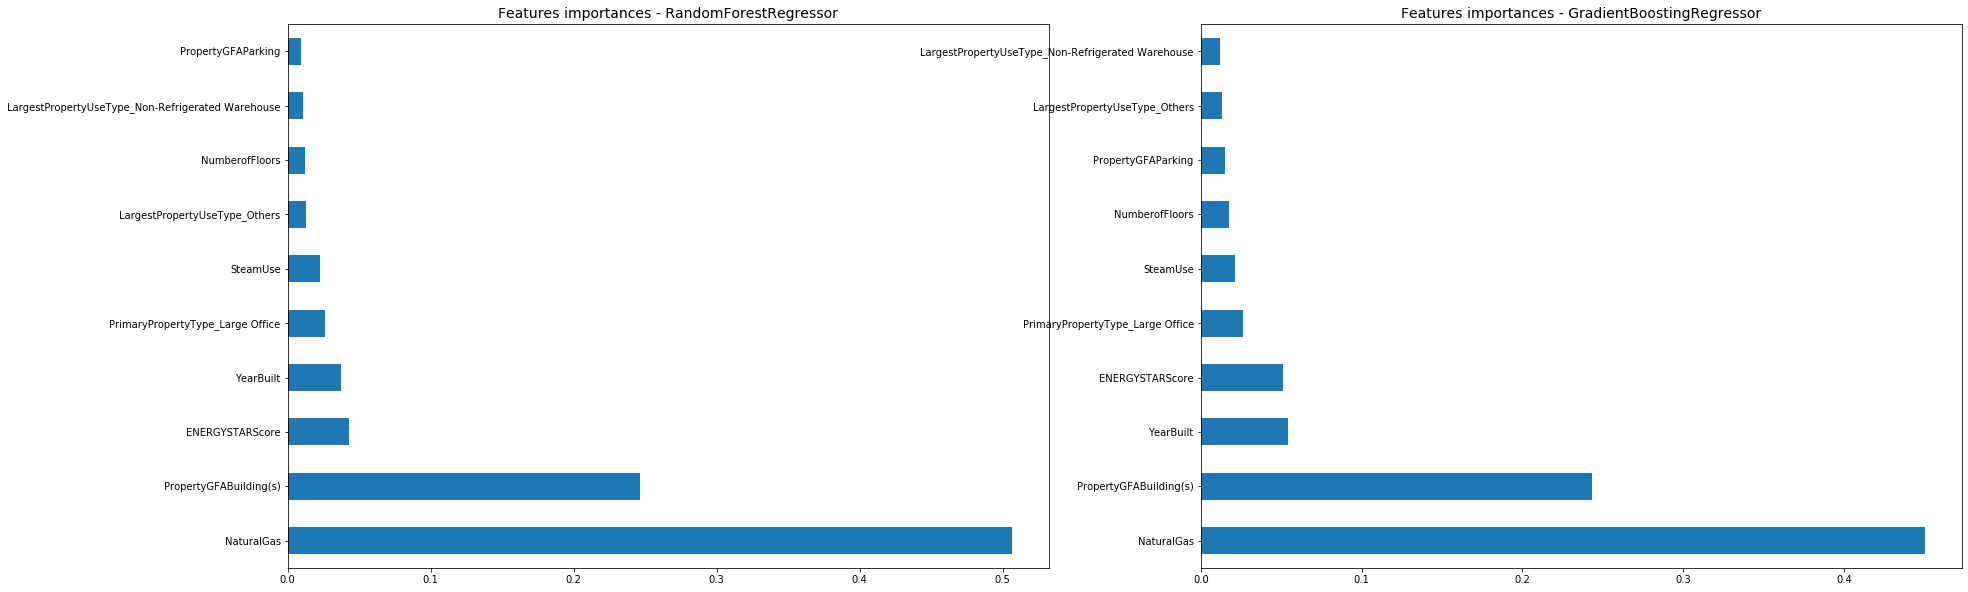

In [55]:
feat_importances_forest = pd.Series(forest.feature_importances_, index=X_train.columns)
print("Features importances - RandomForestRegressor")
print(feat_importances_forest.nlargest(10))
print("")
print("-----------------------------------------------")

feat_importances_GboostR = pd.Series(GboostR.feature_importances_, index=X_train.columns)
print("Features importances - GradientBoostingRegressor")
print(feat_importances_GboostR.nlargest(10))
print("")
print("-----------------------------------------------")

plt.subplots(figsize=(30,10))
plt.subplot(1, 2, 1)
plt.title("Features importances - RandomForestRegressor", size=14)
feat_importances_forest.nlargest(10).plot(kind='barh')

plt.subplot(1, 2, 2)
plt.title("Features importances - GradientBoostingRegressor", size=14)
feat_importances_GboostR.nlargest(10).plot(kind='barh')


# 6- Courbe d'apprentissage | Learning curve

Nous alons maintenant tracer la courbe d'apprentissage (learning curve).

La learning curve est un élément visuel qui nous permet facilement de constater que nous avons suffisament de données pour que notre modèle de prédiction soit optimal.

In [56]:
#Fonction de traçage de la courbe d'apprentissage (learning curve)
#Code source : Doc Scikit-learn

from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure(figsize=(10,10))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target

plt.show()

RAPPEL : Il y a 4752 observations dans le dataset d'entrainement.
Wall time: 1min 43s


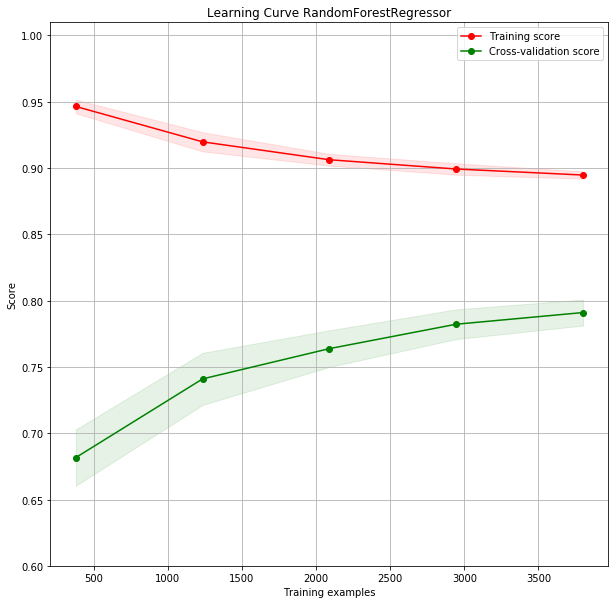

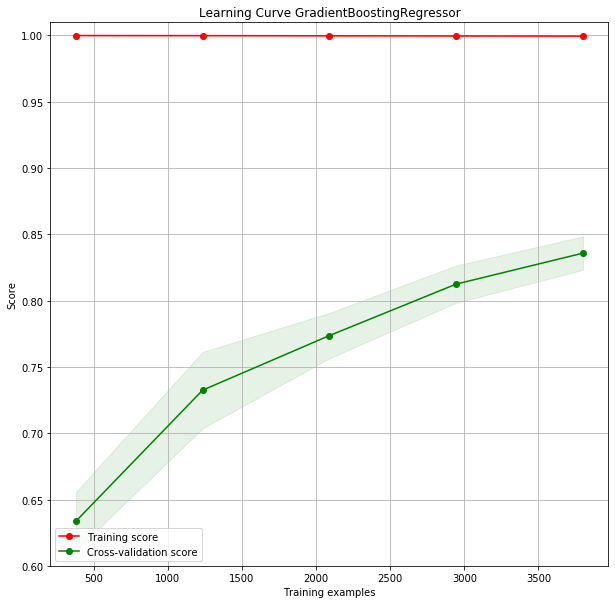

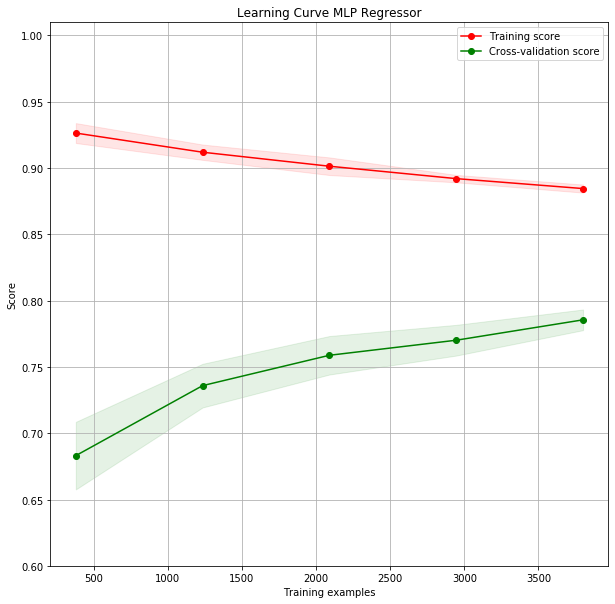

In [57]:
%%time
from sklearn.model_selection import ShuffleSplit
#RANDOMFORESTREGRESSOR
#Paramétrage de la fonction de traçage de la courbe
title = "Learning Curve RandomForestRegressor"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(forest, title, X_train, y_train, ylim=(0.6, 1.01), cv=cv, n_jobs=-1)

#########################################################################################
#GRADIENTBOOSTINGREGRESSOR
#Paramétrage de la fonction de traçage de la courbe
title = "Learning Curve GradientBoostingRegressor"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(GboostR, title, X_train, y_train, ylim=(0.6, 1.01), cv=cv, n_jobs=-1)

#########################################################################################
#MLPREGRESSOR
#Paramétrage de la fonction de traçage de la courbe
title = "Learning Curve MLP Regressor"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(MLPR, title, X_train, y_train, ylim=(0.6, 1.01), cv=cv, n_jobs=-1)

print("RAPPEL : Il y a", X_train.shape[0], "observations dans le dataset d'entrainement.")